In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import resource
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

In [3]:
#import __future__
import numpy as np
import sys

from root_numpy import root2array, tree2array
from root_numpy import testdata
import ROOT
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.colors as colors

import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
from scipy.interpolate import interp1d
from scipy.integrate import quad

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Welcome to JupyROOT 6.14/00


In [4]:
anumu = ROOT.TFile('../../Ntuples/anumu_dm_2000GeV.root')
numu = ROOT.TFile('../../Ntuples/numu_dm_2000GeV.root')
atmu = ROOT.TFile('../../Ntuples/mupage_sun.root')
data = ROOT.TFile('../../Ntuples/nTupla_DATA_CUTTED.root')




In [5]:
# load Ntuples
anu = anumu.Get('antree')
nu = numu.Get('antree')
mu = atmu.Get('antree')
da = data.Get('antree')
# and convert the TTree into an array
anu_arr = tree2array(anu)
nu_arr= tree2array(nu)
mu_arr= tree2array(mu)
da_arr= tree2array(da)

In [6]:
h5f = h5py.File('../../datafiles/dm2bb_nu_1000.0_GeV.h5','r')
nu_w_bb_2000 = h5f['w_bb_1000.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2bb_anu_1000.0_GeV.h5','r')
anu_w_bb_2000 = h5f['w_bb_1000.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2tt_nu_1000.0_GeV.h5','r')
nu_w_tt_2000 = h5f['w_tt_1000.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2tt_anu_1000.0_GeV.h5','r')
anu_w_tt_2000 = h5f['w_tt_1000.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2WW_nu_1000.0_GeV.h5','r')
nu_w_WW_2000 = h5f['w_WW_1000.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2WW_anu_1000.0_GeV.h5','r')
anu_w_WW_2000 = h5f['w_WW_1000.0'][:]
h5f.close()


In [7]:
h5f = h5py.File('../../datafiles/dm2bb_nu_100.0_GeV.h5','r')
nu_w_bb_100 = h5f['w_bb_100.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2bb_anu_100.0_GeV.h5','r')
anu_w_bb_100 = h5f['w_bb_100.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2tt_nu_100.0_GeV.h5','r')
nu_w_tt_100 = h5f['w_tt_100.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2tt_anu_100.0_GeV.h5','r')
anu_w_tt_100 = h5f['w_tt_100.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2WW_nu_100.0_GeV.h5','r')
nu_w_WW_100 = h5f['w_WW_100.0'][:]
h5f.close()
h5f = h5py.File('../../datafiles/dm2WW_anu_100.0_GeV.h5','r')
anu_w_WW_100 = h5f['w_WW_100.0'][:]
h5f.close()

In [8]:
#dates
ymd_min, ymd_max2012, ymd_max2016 = 20072020, 20122020, 20162020 
#direction 
cos_min, cos_max = 0., 1.
#quality
beta_max = 1.
# runs
run_min, run_max = 25800,68170
# lambda 
lam_min, lam_max = -5.3, -3.

# define weights
w_bg_anu  = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*(anu_arr["mc_wH"]+anu_arr["mc_wS"])
w_bg_nu   =  nu_arr["mc_rbr"]* nu_arr["mc_wc"] *(nu_arr["mc_wH"]+ nu_arr["mc_wS"])
# define cuts
mu_cuts2012   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2012)#&(mu_arr["a_beta"]<beta_max)#(mu_arr["a_lambda"]>lam_min)&\

mu_cuts2016   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2016)#&(mu_arr["a_beta"]<beta_max)#(mu_arr["a_lambda"]>lam_min)&\

    
nu_cuts2012   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2012)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)#(nu_arr["a_beta"]<beta_max)#&(nu_arr["a_lambda"]>lam_min)
    
nu_cuts2016   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2016)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)#(nu_arr["a_beta"]<beta_max)#&(nu_arr["a_lambda"]>lam_min)
    
    
anu_cuts2012   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2012)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(np.cos(anu_arr["a_th"])<cos_max)#&(anu_arr["a_beta"]<beta_max)#&(anu_arr["a_lambda"]>lam_min)

anu_cuts2016   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2016)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(np.cos(anu_arr["a_th"])<cos_max)#&(anu_arr["a_beta"]<beta_max)#&(anu_arr["a_lambda"]>lam_min)
    
da_cuts2012   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2012)&\
              (np.cos(da_arr["a_th"])>cos_min)&(np.cos(da_arr["a_th"])<cos_max)#&(da_arr["a_beta"]<beta_max)#&(da_arr["a_lambda"]>lam_min)

da_cuts2016   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2016)&\
              (np.cos(da_arr["a_th"])>cos_min)&(np.cos(da_arr["a_th"])<cos_max)#&(da_arr["a_beta"]<beta_max)#&(da_arr["a_lambda"]>lam_min)
    

<IPython.core.display.Javascript object>


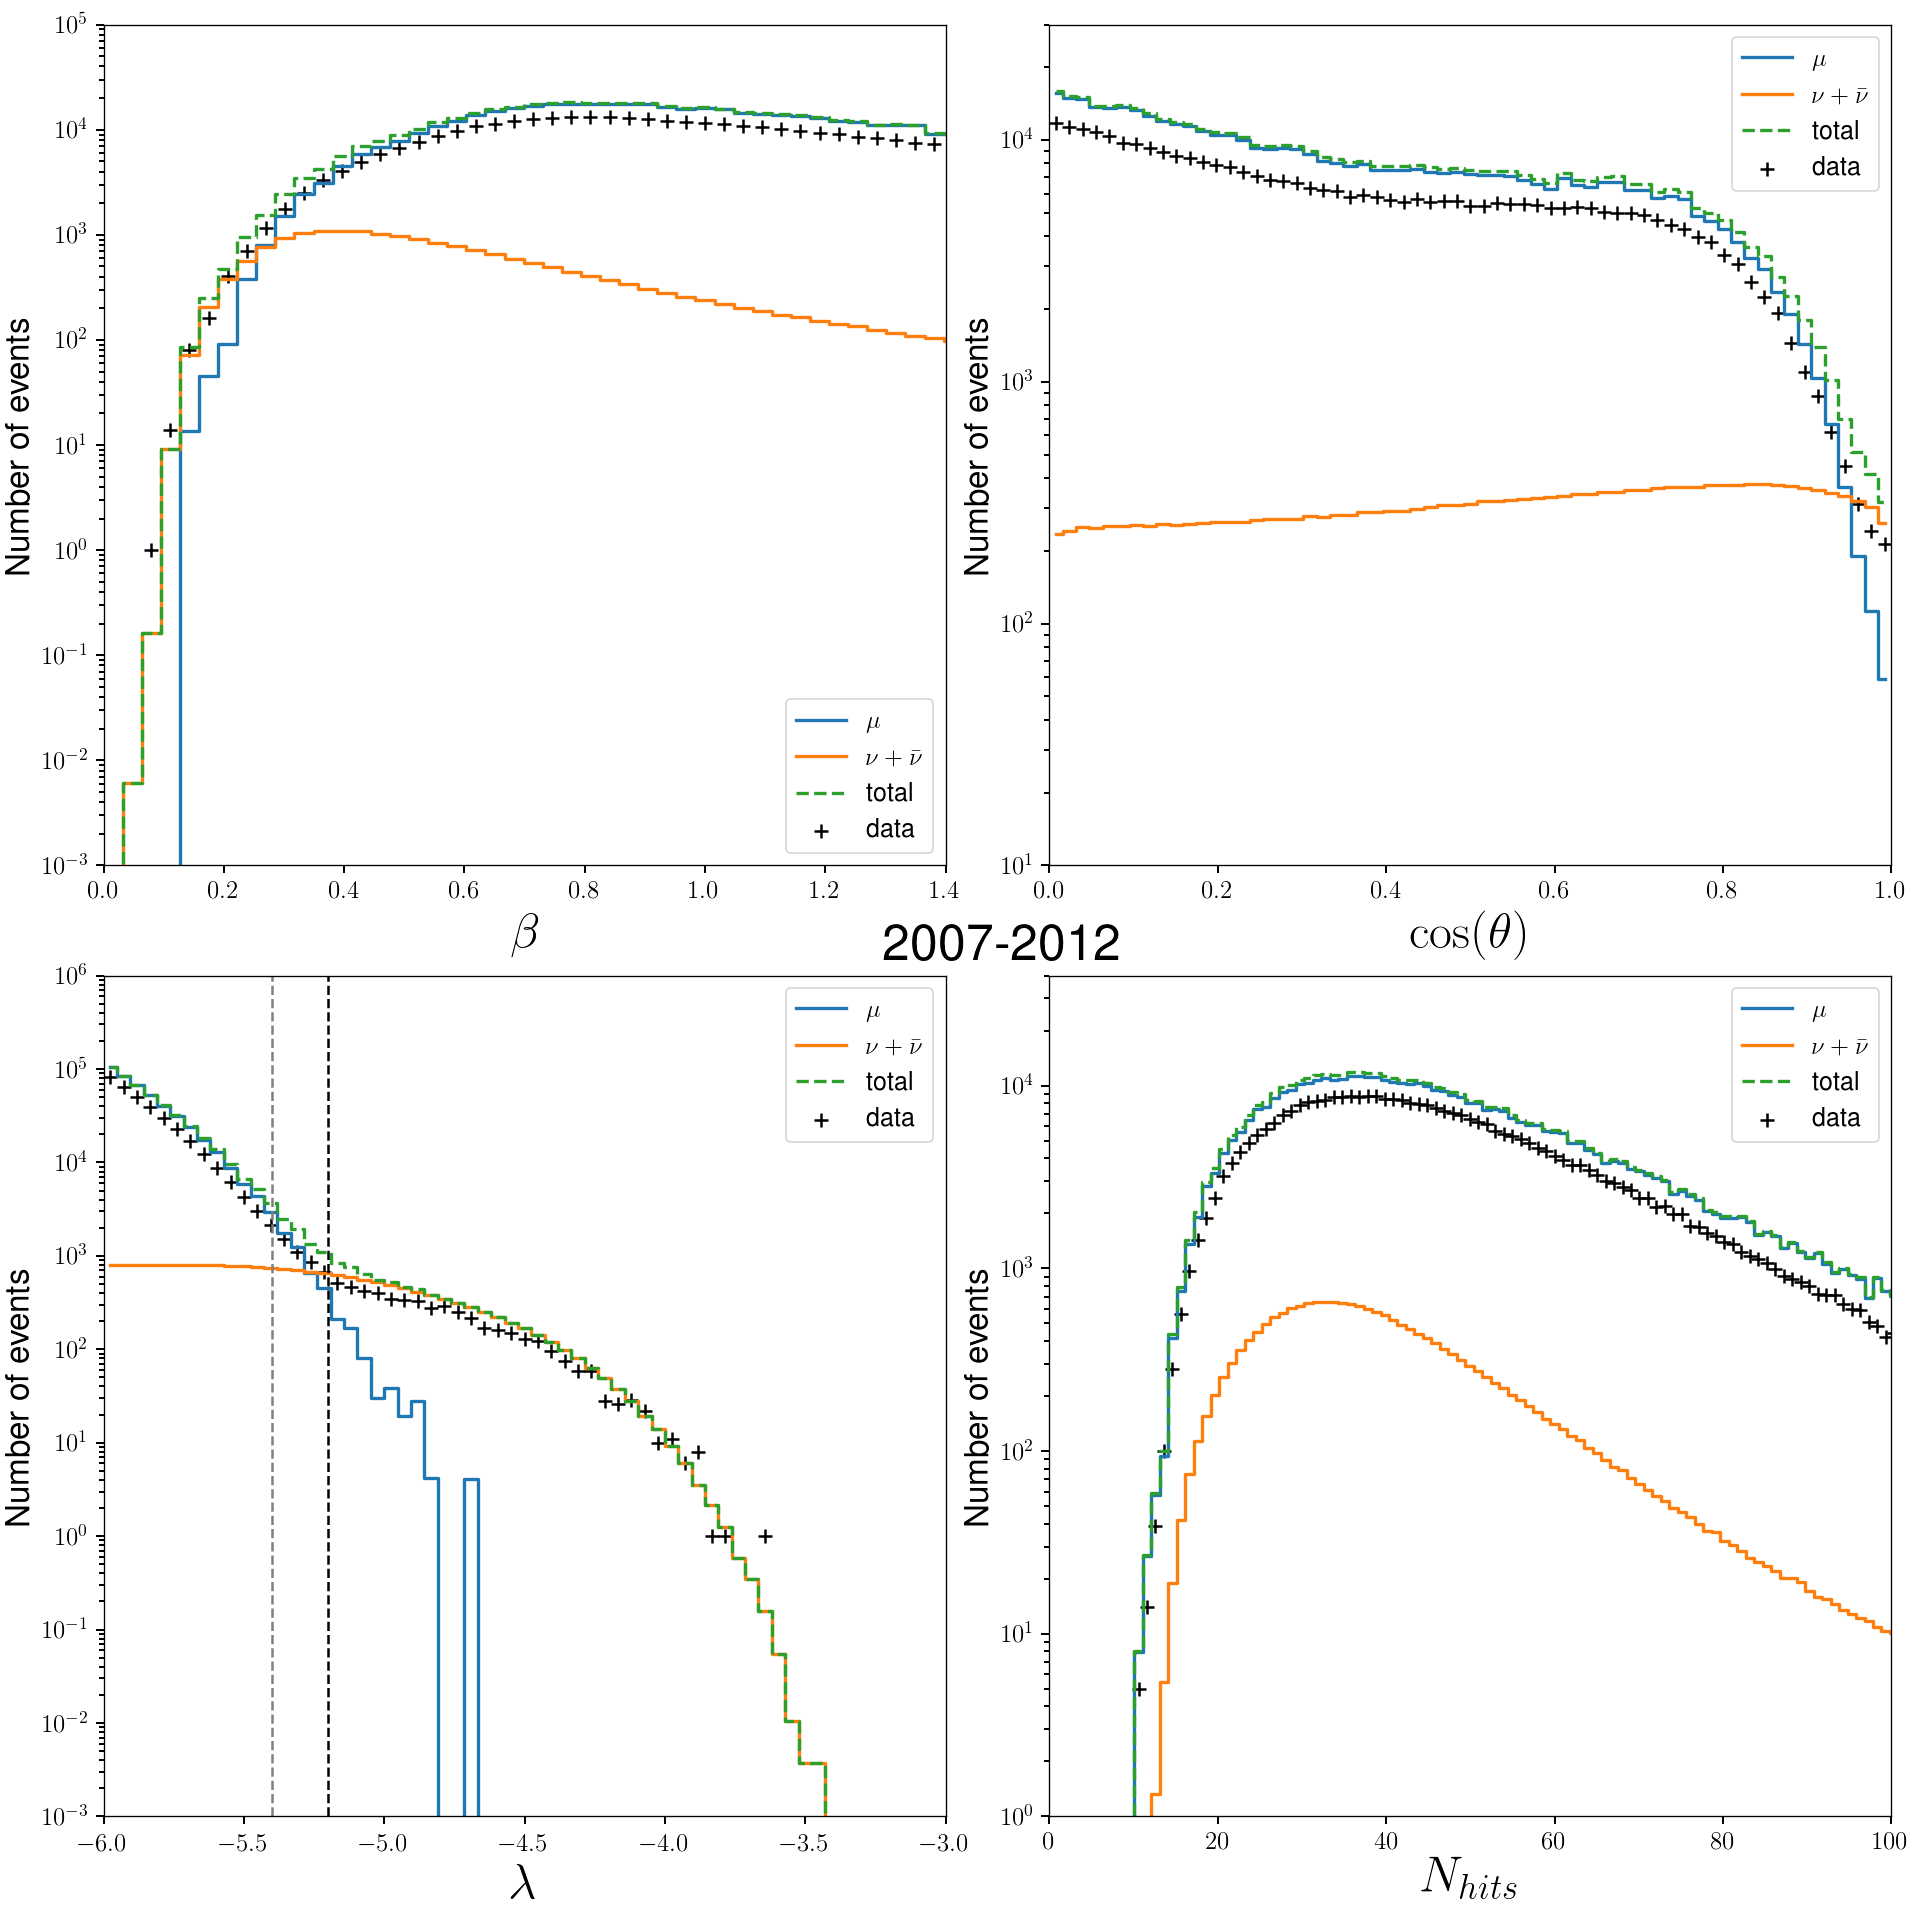

In [9]:
bins = np.linspace(0,2,64)
fonto = 30

bg_mu,x_mu = np.histogram((mu_arr["a_beta"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_beta"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_beta"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_beta"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

fig, ax = plt.subplots(2,2,figsize=[16,16])
fig.text(.46,.5,"2007-2012",fontsize=30)
ax[0,0].set_xlabel(r"$\beta$",fontsize=fonto)
ax[0,0].set_ylabel(r"Number of events",fontsize=20)

ax[0,0].set_yscale("log")
ax[0,0].set_xlim([0,1.4])
ax[0,0].set_ylim([1e-3,1e5])
ax[0,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,0].scatter(xda_c,bg_da,marker="+",color='k',s=70,lw=1.5,label="data")

legend = ax[0,0].legend(loc='lower right', ncol=1, shadow=False, fontsize=15)
ax[0,0].axvline(x=-5.2,linestyle='--',color='k')
ax[0,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()

bins = np.linspace(-6,-3,64)
bg_mu,x_mu = np.histogram((mu_arr["a_lambda"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_lambda"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_lambda"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_lambda"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[12,7])
ax[1,0].set_xlabel(r"$\lambda$",fontsize=fonto)
ax[1,0].set_ylabel(r"Number of events",fontsize=20)

ax[1,0].set_yscale("log")
ax[1,0].set_xlim([-6,-3])
ax[1,0].set_ylim([1e-3,1e6])
ax[1,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,0].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")

legend = ax[1,0].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,0].axvline(x=-5.2,linestyle='--',color='k')
ax[1,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,1,64)

bg_mu,x_mu = np.histogram(np.cos((mu_arr["a_th"])[mu_cuts2012]),bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram(np.cos((nu_arr["a_th"])[nu_cuts2012]),bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((np.cos(anu_arr["a_th"])[anu_cuts2012]),bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((np.cos(da_arr["a_th"])[da_cuts2012]),bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2


#fig, ax1 = plt.subplots(figsize=[7,7])

ax[0,1].set_xlabel(r"$\cos(\theta)$",fontsize=fonto)
ax[0,1].set_ylabel(r"Number of events",fontsize=20)

ax[0,1].set_yscale("log")
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([10,30000])

ax[0,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[0,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[0,1].axvline(x=-5.2,linestyle='--',color='k')
ax[0,1].axvline(x=-5.4,linestyle='--',color='gray')




bins = np.linspace(0,120,120)


bg_mu,x_mu = np.histogram((mu_arr["a_nhits"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_nhits"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_nhits"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_nhits"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2
fig.tight_layout()
#fig, ax = plt.subplots(figsize=[7,7])

ax[1,1].set_xlabel(r"$N_{hits}$",fontsize=fonto)

ax[1,1].set_ylabel(r"Number of events",fontsize=20)
ax[1,1].set_yscale("log")
ax[1,1].set_ylim([1,40000])
ax[1,1].set_xlim([0,100])

ax[1,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[1,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,1].axvline(x=-5.2,linestyle='--',color='k')
ax[1,1].axvline(x=-5.4,linestyle='--',color='gray')

ax[0,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[0,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


<IPython.core.display.Javascript object>


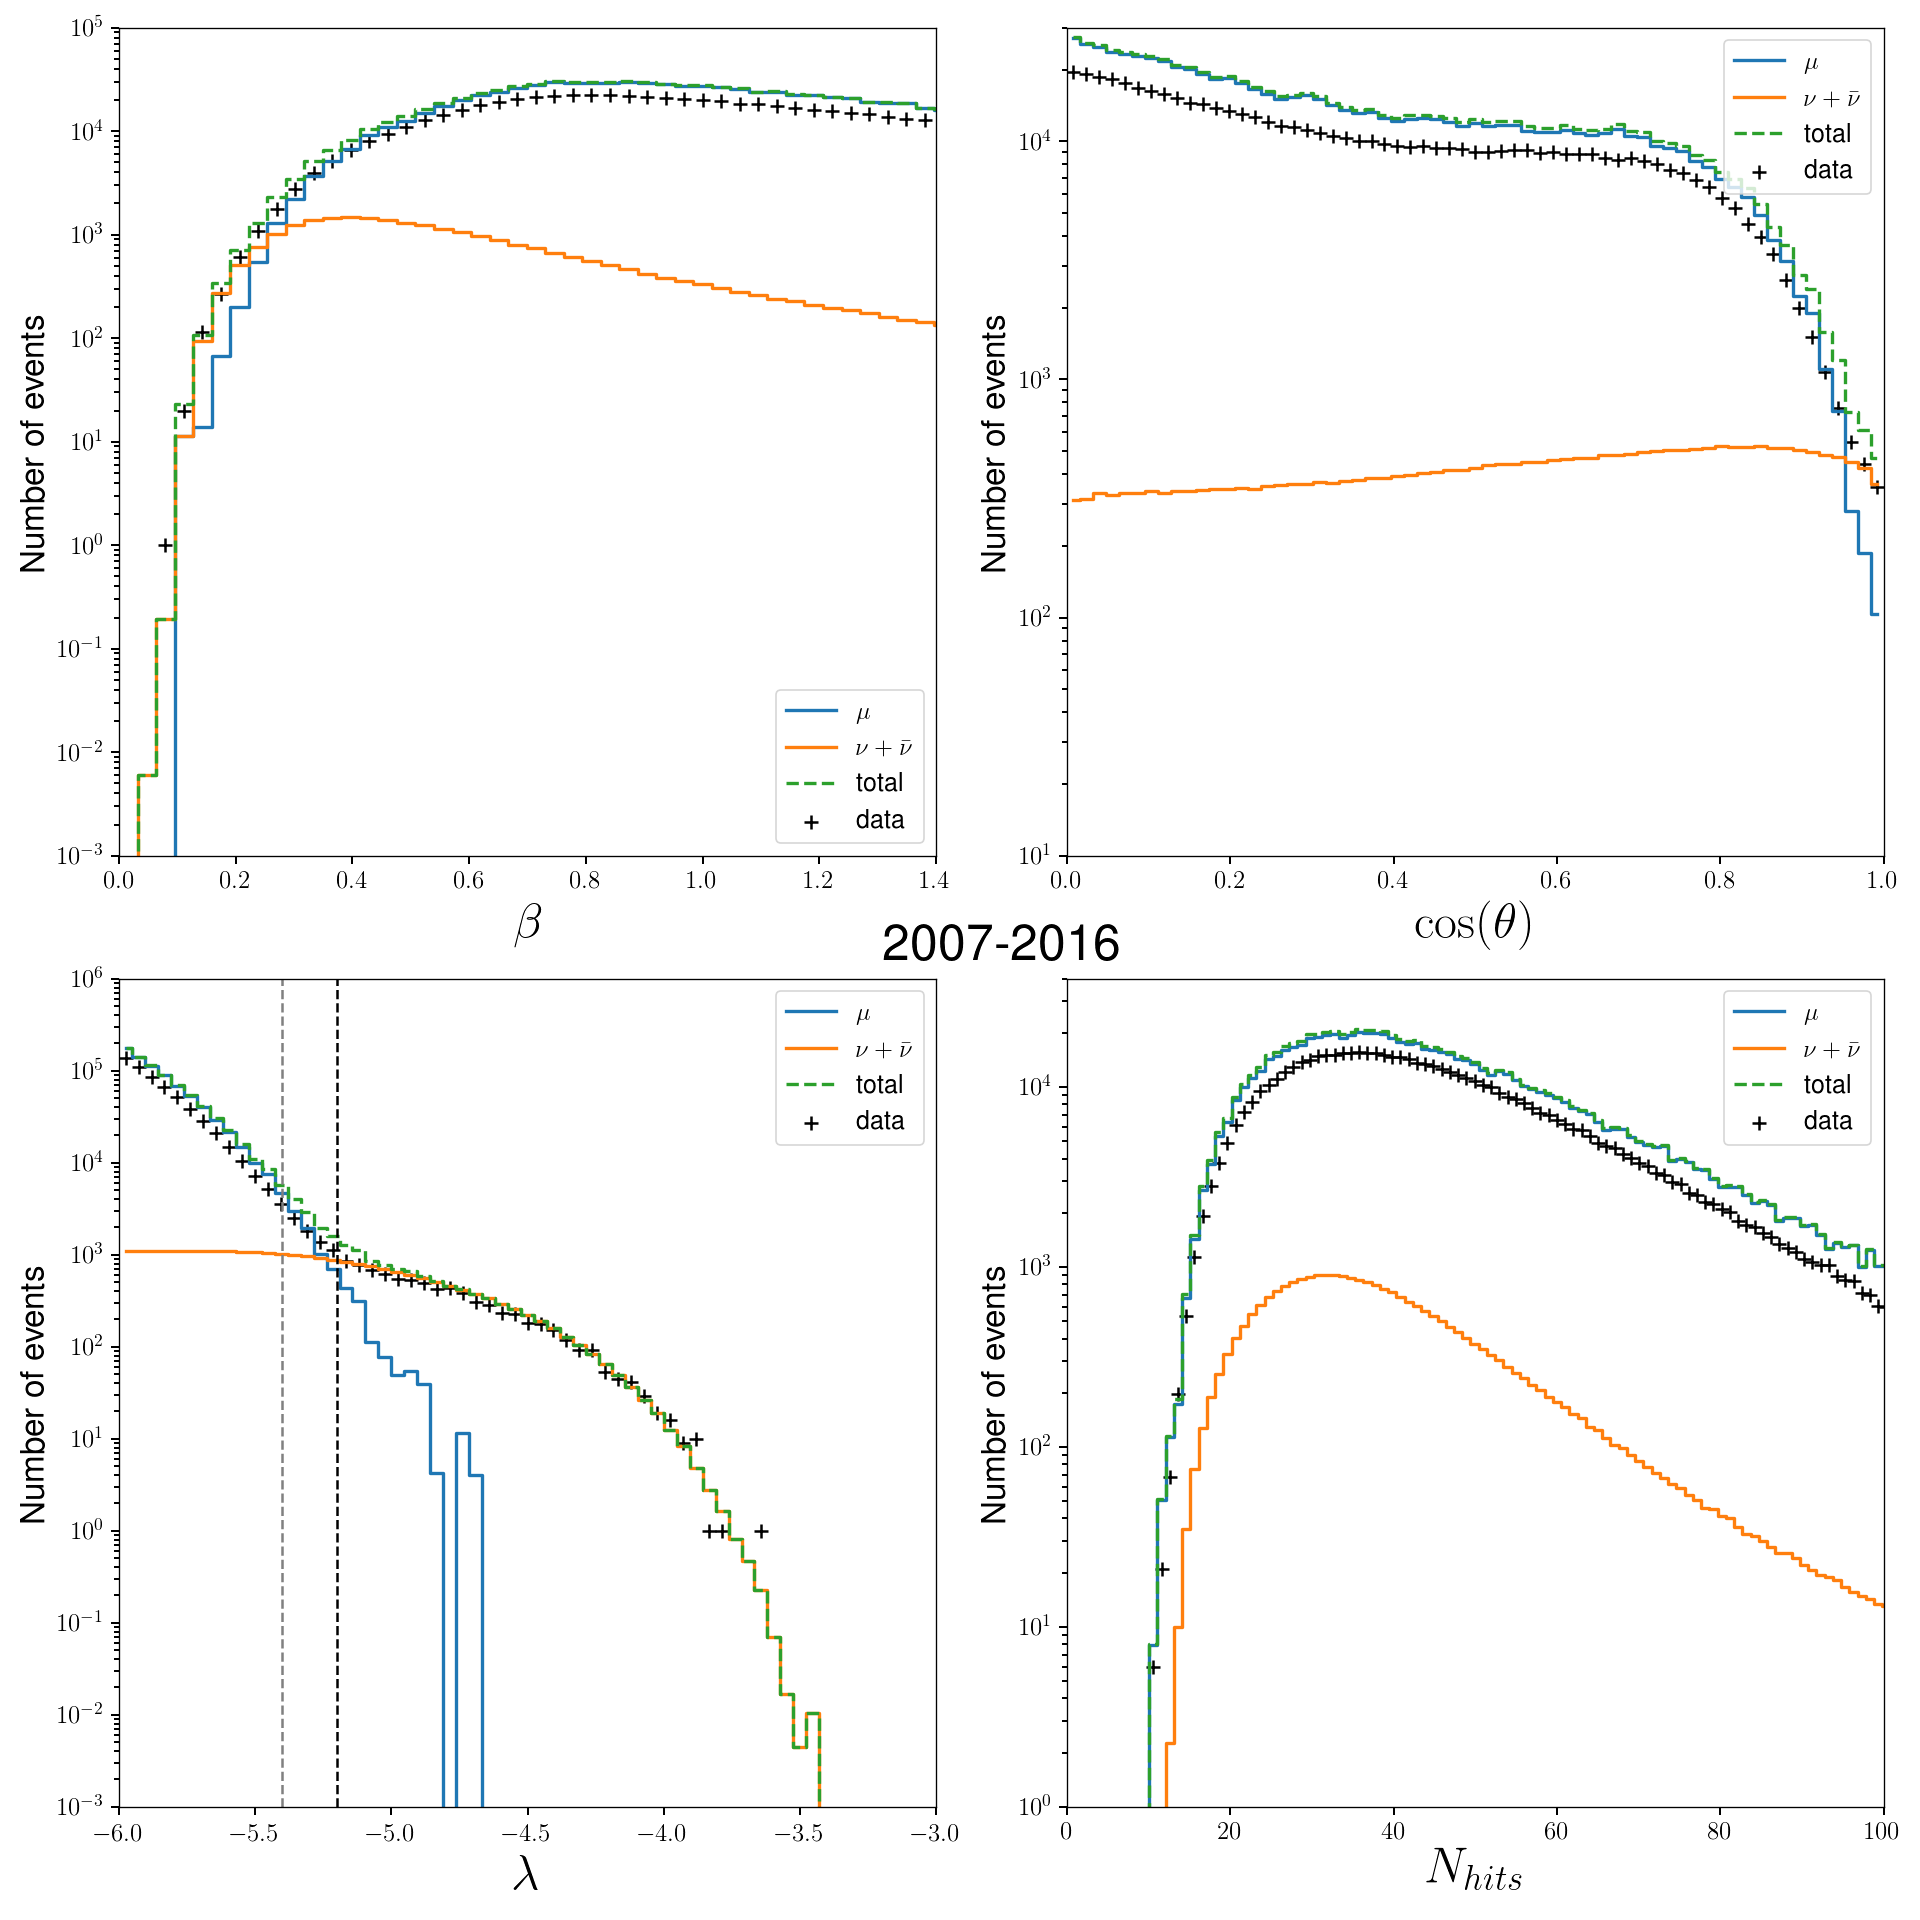

In [10]:
bins = np.linspace(0,2,64)
fonto = 30

bg_mu,x_mu = np.histogram((mu_arr["a_beta"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_beta"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_beta"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_beta"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

fig, ax = plt.subplots(2,2,figsize=[16,16])
fig.text(.46,.5,"2007-2016",fontsize=30)
ax[0,0].set_xlabel(r"$\beta$",fontsize=fonto)
ax[0,0].set_ylabel(r"Number of events",fontsize=20)

ax[0,0].set_yscale("log")
ax[0,0].set_xlim([0,1.4])
ax[0,0].set_ylim([1e-3,1e5])
ax[0,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,0].scatter(xda_c,bg_da,marker="+",color='k',s=70,lw=1.5,label="data")

legend = ax[0,0].legend(loc='lower right', ncol=1, shadow=False, fontsize=15)
ax[0,0].axvline(x=-5.2,linestyle='--',color='k')
ax[0,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()

bins = np.linspace(-6,-3,64)
bg_mu,x_mu = np.histogram((mu_arr["a_lambda"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_lambda"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_lambda"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_lambda"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[12,7])
ax[1,0].set_xlabel(r"$\lambda$",fontsize=fonto)
ax[1,0].set_ylabel(r"Number of events",fontsize=20)

ax[1,0].set_yscale("log")
ax[1,0].set_xlim([-6,-3])
ax[1,0].set_ylim([1e-3,1e6])
ax[1,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,0].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")

legend = ax[1,0].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,0].axvline(x=-5.2,linestyle='--',color='k')
ax[1,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,1,64)

bg_mu,x_mu = np.histogram(np.cos((mu_arr["a_th"])[mu_cuts2016]),bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram(np.cos((nu_arr["a_th"])[nu_cuts2016]),bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((np.cos(anu_arr["a_th"])[anu_cuts2016]),bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((np.cos(da_arr["a_th"])[da_cuts2016]),bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2


#fig, ax1 = plt.subplots(figsize=[7,7])

ax[0,1].set_xlabel(r"$\cos(\theta)$",fontsize=fonto)
ax[0,1].set_ylabel(r"Number of events",fontsize=20)

ax[0,1].set_yscale("log")
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([10,30000])

ax[0,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[0,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[0,1].axvline(x=-5.2,linestyle='--',color='k')
ax[0,1].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,120,120)


bg_mu,x_mu = np.histogram((mu_arr["a_nhits"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_nhits"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_nhits"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_nhits"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[7,7])
ax[1,1].set_xlabel(r"$N_{hits}$",fontsize=fonto)
ax[1,1].set_ylabel(r"Number of events",fontsize=20)

ax[1,1].set_yscale("log")
ax[1,1].set_ylim([1,40000])
ax[1,1].set_xlim([0,100])

ax[1,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[1,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,1].axvline(x=-5.2,linestyle='--',color='k')
ax[1,1].axvline(x=-5.4,linestyle='--',color='gray')
ax[0,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[0,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)​




fig.tight_layout()

In [11]:

w_sg_nu_tt = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_w_tt_2000
w_sg_nu_WW = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_w_WW_2000
w_sg_nu_bb = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_w_bb_2000
w_sg_anu_tt = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_w_tt_2000
w_sg_anu_WW = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_w_WW_2000
w_sg_anu_bb = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_w_bb_2000

w_sg_nu_tt100 = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_w_tt_100
w_sg_nu_bb100 = nu_arr["mc_rbr"]*nu_arr["mc_wc"]*nu_arr["mc_w2"]*nu_w_bb_100
w_sg_anu_tt100 = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_w_tt_100
w_sg_anu_bb100 = anu_arr["mc_rbr"]*anu_arr["mc_wc"]*anu_arr["mc_w2"]*anu_w_bb_100


bins = np.linspace(0,2000,60)
dowenorm = False
sg_tt,x_sg_tt = np.histogram(nu_arr["mc_ene"],bins=bins,weights=w_sg_nu_tt,normed=dowenorm)
xsgc_tt = (x_sg_tt[:-1]+x_sg_tt[1:])/2

sg_WW,x_sg_WW = np.histogram(nu_arr["mc_ene"],bins=bins,weights=w_sg_nu_WW,normed=dowenorm)
xsgc_WW = (x_sg_tt[:-1]+x_sg_WW[1:])/2

sg_bb,x_sg_bb = np.histogram(nu_arr["mc_ene"],bins=bins,weights=w_sg_nu_bb,normed=dowenorm)
xsgc_bb = (x_sg_bb[:-1]+x_sg_bb[1:])/2



In [12]:
x_spec = np.linspace(0.0025,1.,200)*188

bins = np.linspace(0,200,60)
dowenorm = False
sg_tt,x_sg_tt = np.histogram(nu_arr["a_nhits"],bins=bins,weights=w_sg_nu_tt,normed=dowenorm)
xsgc_tt = (x_sg_tt[:-1]+x_sg_tt[1:])/2

sg_bb,x_sg_bb = np.histogram(nu_arr["a_nhits"],bins=bins,weights=w_sg_nu_bb,normed=dowenorm)
xsgc_bb = (x_sg_bb[:-1]+x_sg_bb[1:])/2

sg_tt100,x_sg_tt = np.histogram(nu_arr["a_nhits"],bins=bins,weights=w_sg_nu_tt100,normed=dowenorm)
xsgc_tt100 = (x_sg_tt[:-1]+x_sg_tt[1:])/2

sg_bb100,x_sg_bb = np.histogram(nu_arr["a_nhits"],bins=bins,weights=w_sg_nu_bb100,normed=dowenorm)
xsgc_bb100 = (x_sg_bb[:-1]+x_sg_bb[1:])/2


<IPython.core.display.Javascript object>


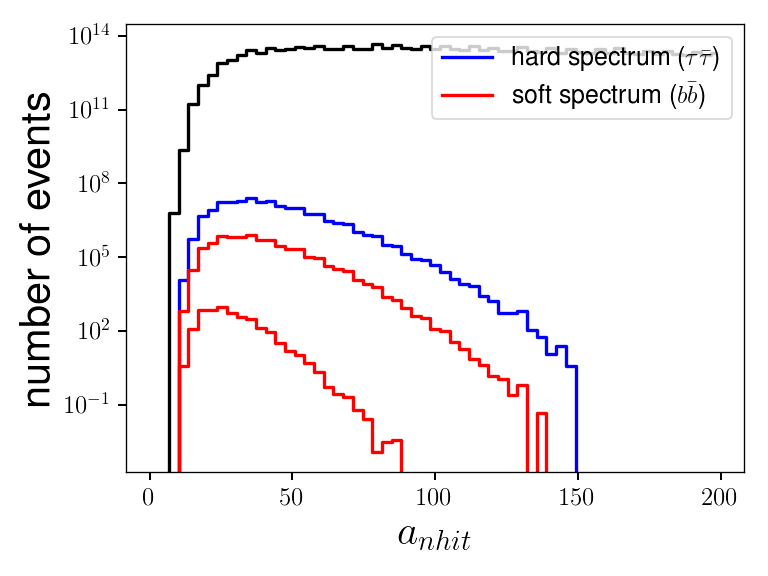

In [13]:



fig, ax =plt.subplots()
ax.set_xlabel(r"$a_{nhit}$",fontsize=25)
ax.set_ylabel(r"number of events",fontsize=25)

ax.set_yscale("log")
#ax.set_xscale("log")

ax.step(xsgc_tt,sg_tt,"b",lw=2,where='mid',label=r"hard spectrum ($\tau \bar{\tau}$)")
ax.step(xsgc_bb,sg_bb,"r",lw=2,where='mid',label=r"soft spectrum ($b \bar{b}$)")

ax.step(xsgc_tt100,sg_tt100,"k--",lw=2,where='mid')
ax.step(xsgc_bb100,sg_bb100,"r--",lw=2,where='mid')
#"""
legend =ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
#ax.text(140,1e4,"1 TeV",fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
fig.tight_layout()

In [14]:
# define cuts
"""
mu_cuts   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["a_beta"]<beta_max)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max)&(mu_arr["a_beta"]<beta_max)&(mu_arr["a_lambda"]>lam_min)
                   
    
nu_cuts   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max)&\
             (np.cos(nu_arr["a_th"])>cos_min)&\
               (nu_arr["a_beta"]<beta_max)&(nu_arr["a_lambda"]>lam_min)
    
    
anu_cuts   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max)&\
              (np.cos(anu_arr["a_th"])>cos_min)&\
                (anu_arr["a_beta"]<beta_max)&(anu_arr["a_lambda"]>lam_min)
"""

mu_cuts2012   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2012)&(mu_arr["a_beta"]<beta_max)&(mu_arr["a_lambda"]>lam_min)

mu_cuts2016   = (np.cos(mu_arr["a_th"])>cos_min)&(mu_arr["run"]>run_min)&\
                (mu_arr["ymd"]>ymd_min)&(mu_arr["ymd"]<ymd_max2016)&(mu_arr["a_beta"]<beta_max)&(mu_arr["a_lambda"]>lam_min)

    
nu_cuts2012   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2012)&\
                  (np.cos(nu_arr["a_th"])>cos_min)&\
                    (nu_arr["a_beta"]<beta_max)&(nu_arr["a_lambda"]>lam_min)
    
nu_cuts2016   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2016)&\
                 (np.cos(nu_arr["a_th"])>cos_min)&\
                  (nu_arr["a_beta"]<beta_max)&(nu_arr["a_lambda"]>lam_min)
    
    
anu_cuts2012   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2012)&\
                  (np.cos(anu_arr["a_th"])>cos_min)&(anu_arr["a_beta"]<beta_max)&(anu_arr["a_lambda"]>lam_min)

anu_cuts2016   = (anu_arr["ymd"]>ymd_min)&(anu_arr["ymd"]<ymd_max2016)&\
              (np.cos(anu_arr["a_th"])>cos_min)&(anu_arr["a_beta"]<beta_max)&(anu_arr["a_lambda"]>lam_min)
    
da_cuts2012   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2012)&\
              (np.cos(da_arr["a_th"])>cos_min)&(da_arr["a_beta"]<beta_max)&(da_arr["a_lambda"]>lam_min)

da_cuts2016   = (da_arr["ymd"]>ymd_min)&(da_arr["ymd"]<ymd_max2016)&\
              (np.cos(da_arr["a_th"])>cos_min)&(da_arr["a_beta"]<beta_max)&(da_arr["a_lambda"]>lam_min)
    

<IPython.core.display.Javascript object>


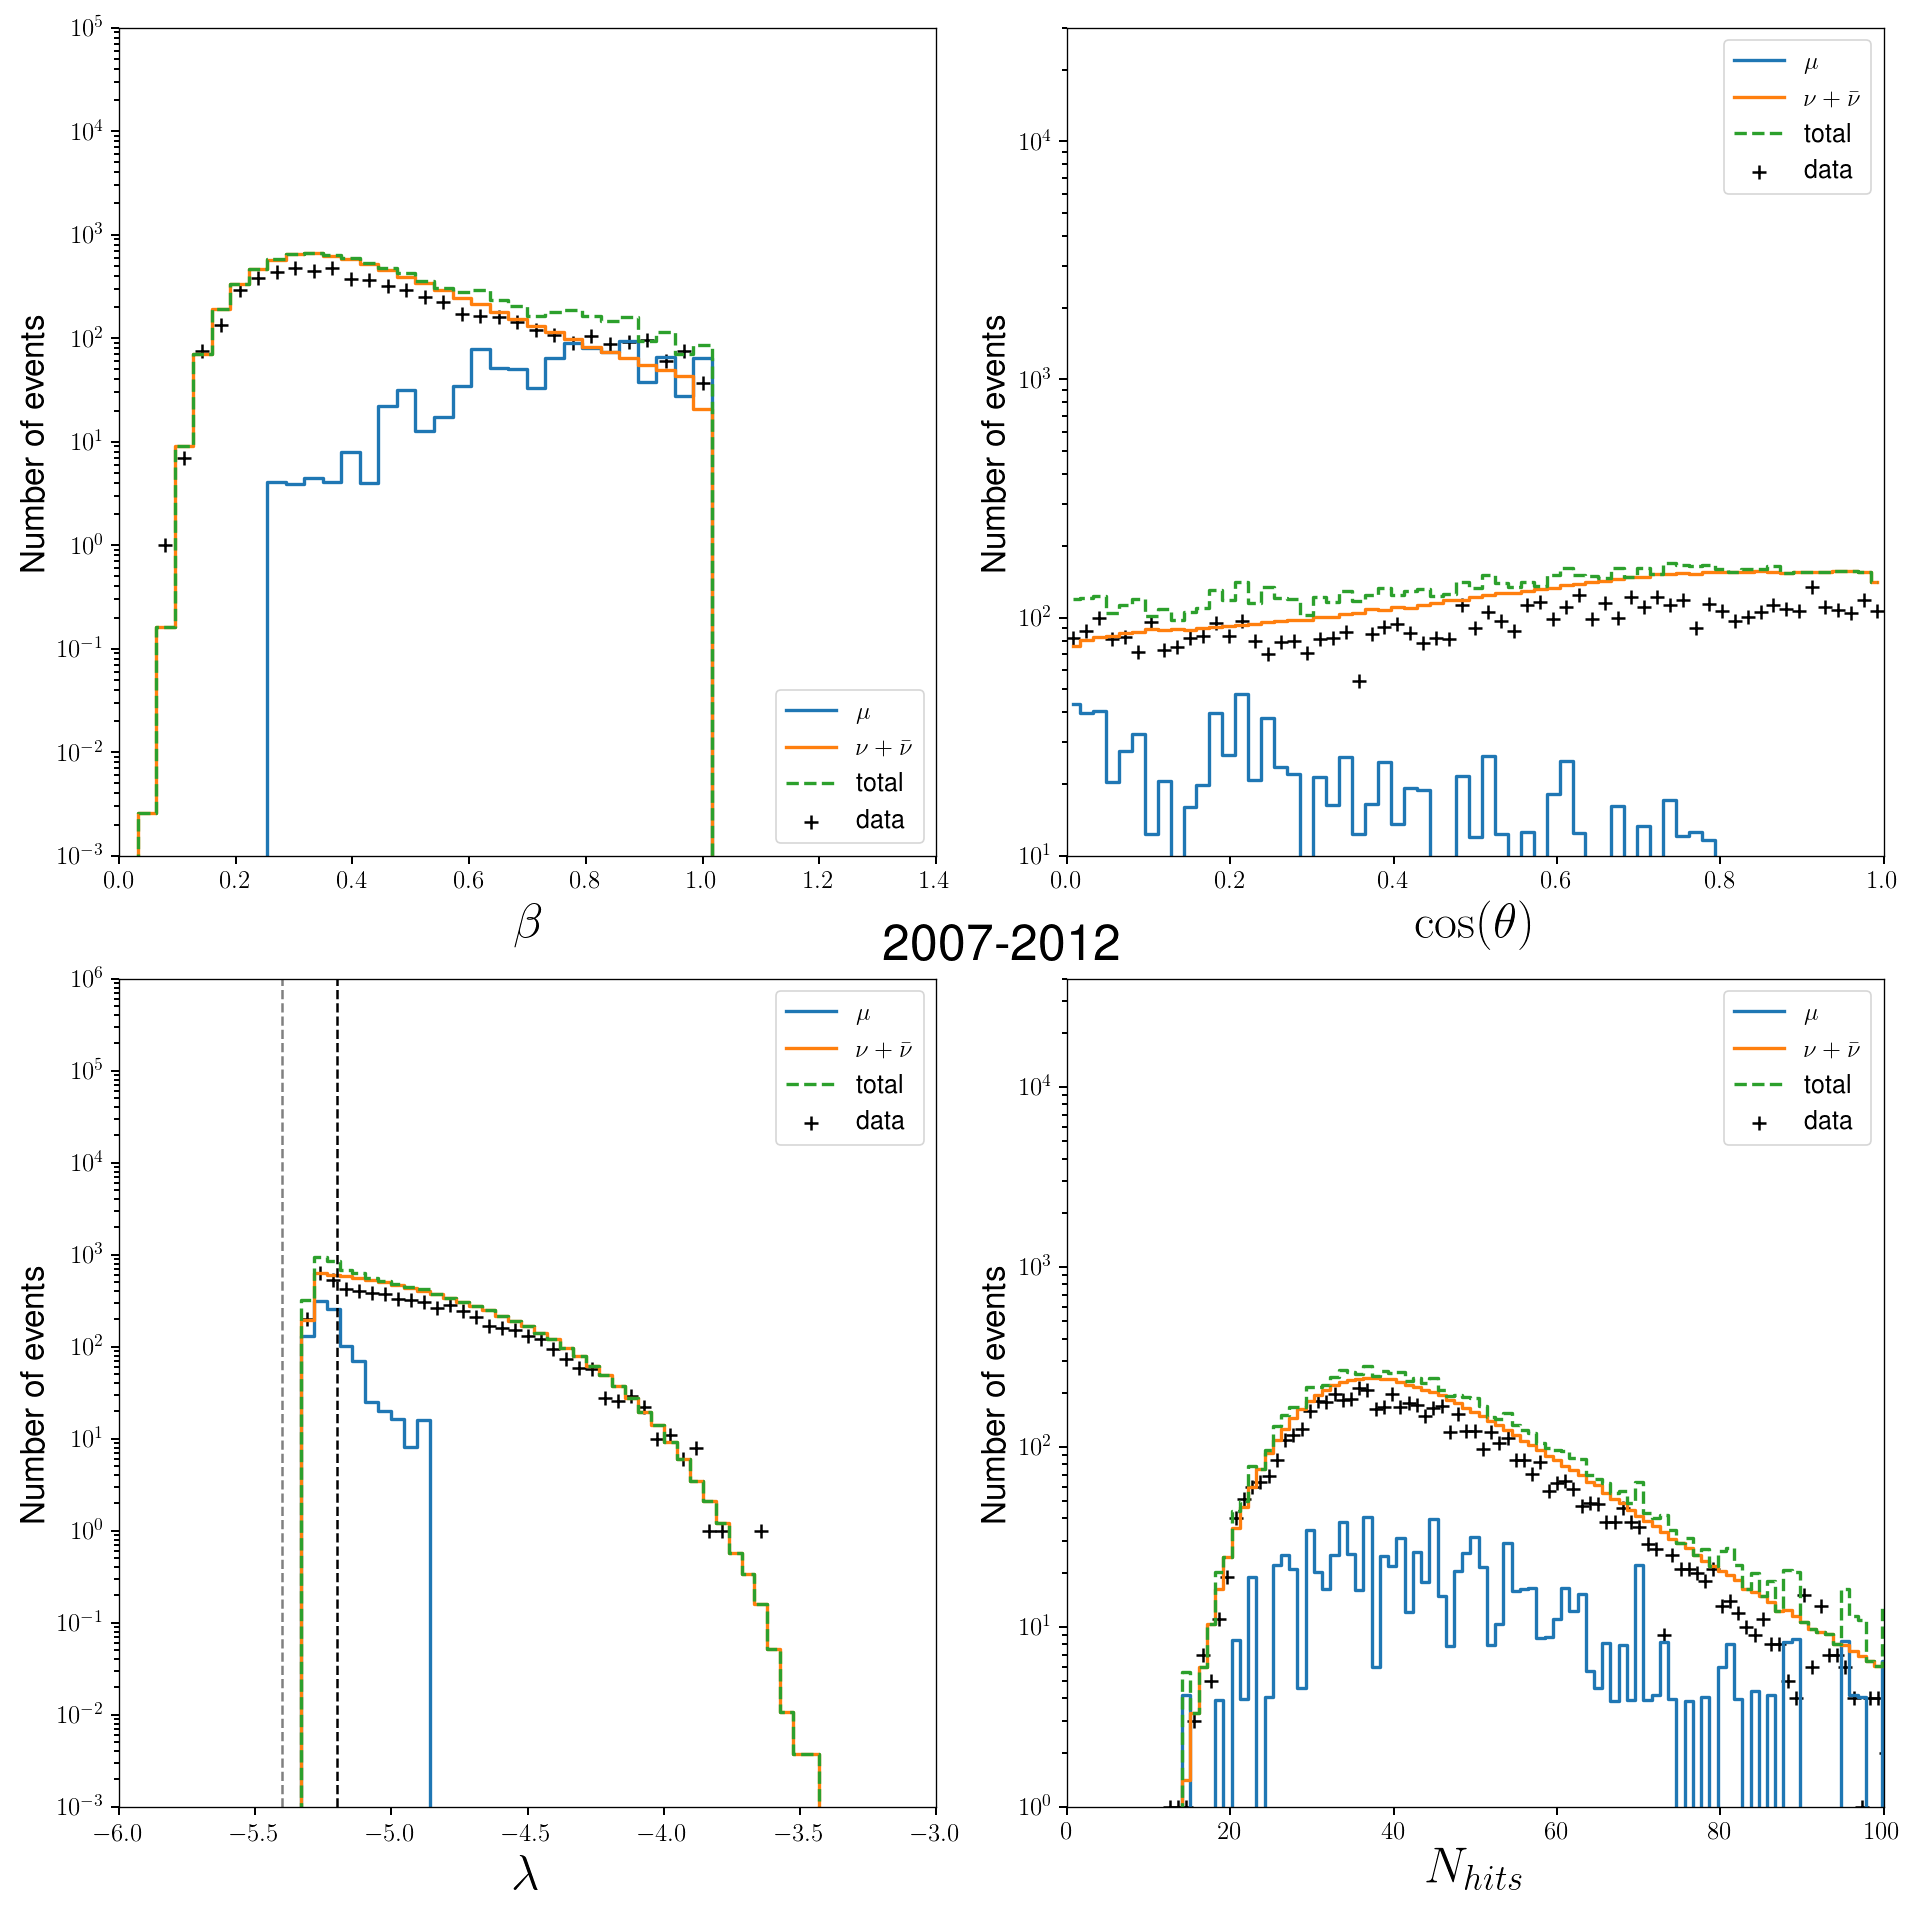

In [15]:
bins = np.linspace(0,2,64)
fonto = 30

bg_mu,x_mu = np.histogram((mu_arr["a_beta"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_beta"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_beta"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_beta"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

fig, ax = plt.subplots(2,2,figsize=[16,16])
fig.text(.46,.5,"2007-2012",fontsize=30)
ax[0,0].set_xlabel(r"$\beta$",fontsize=fonto)
ax[0,0].set_ylabel(r"Number of events",fontsize=20)

ax[0,0].set_yscale("log")
ax[0,0].set_xlim([0,1.4])
ax[0,0].set_ylim([1e-3,1e5])
ax[0,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,0].scatter(xda_c,bg_da,marker="+",color='k',s=70,lw=1.5,label="data")

legend = ax[0,0].legend(loc='lower right', ncol=1, shadow=False, fontsize=15)
ax[0,0].axvline(x=-5.2,linestyle='--',color='k')
ax[0,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()

bins = np.linspace(-6,-3,64)
bg_mu,x_mu = np.histogram((mu_arr["a_lambda"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_lambda"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_lambda"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_lambda"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[12,7])
ax[1,0].set_xlabel(r"$\lambda$",fontsize=fonto)
ax[1,0].set_ylabel(r"Number of events",fontsize=20)

ax[1,0].set_yscale("log")
ax[1,0].set_xlim([-6,-3])
ax[1,0].set_ylim([1e-3,1e6])
ax[1,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,0].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")

legend = ax[1,0].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,0].axvline(x=-5.2,linestyle='--',color='k')
ax[1,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,1,64)

bg_mu,x_mu = np.histogram(np.cos((mu_arr["a_th"])[mu_cuts2012]),bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram(np.cos((nu_arr["a_th"])[nu_cuts2012]),bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((np.cos(anu_arr["a_th"])[anu_cuts2012]),bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((np.cos(da_arr["a_th"])[da_cuts2012]),bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2


#fig, ax1 = plt.subplots(figsize=[7,7])

ax[0,1].set_xlabel(r"$\cos(\theta)$",fontsize=fonto)
ax[0,1].set_ylabel(r"Number of events",fontsize=20)

ax[0,1].set_yscale("log")
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([10,30000])

ax[0,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[0,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[0,1].axvline(x=-5.2,linestyle='--',color='k')
ax[0,1].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,120,120)


bg_mu,x_mu = np.histogram((mu_arr["a_nhits"])[mu_cuts2012],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2012])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_nhits"])[nu_cuts2012],bins=bins,weights=w_bg_nu[nu_cuts2012])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_nhits"])[anu_cuts2012],bins=bins,weights=w_bg_anu[anu_cuts2012])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_nhits"])[da_cuts2012],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[7,7])
ax[1,1].set_xlabel(r"$N_{hits}$",fontsize=fonto)
ax[1,1].set_ylabel(r"Number of events",fontsize=20)

ax[1,1].set_yscale("log")
ax[1,1].set_ylim([1,40000])
ax[1,1].set_xlim([0,100])

ax[1,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[1,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,1].axvline(x=-5.2,linestyle='--',color='k')
ax[1,1].axvline(x=-5.4,linestyle='--',color='gray')
ax[0,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[0,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


fig.tight_layout()

<IPython.core.display.Javascript object>


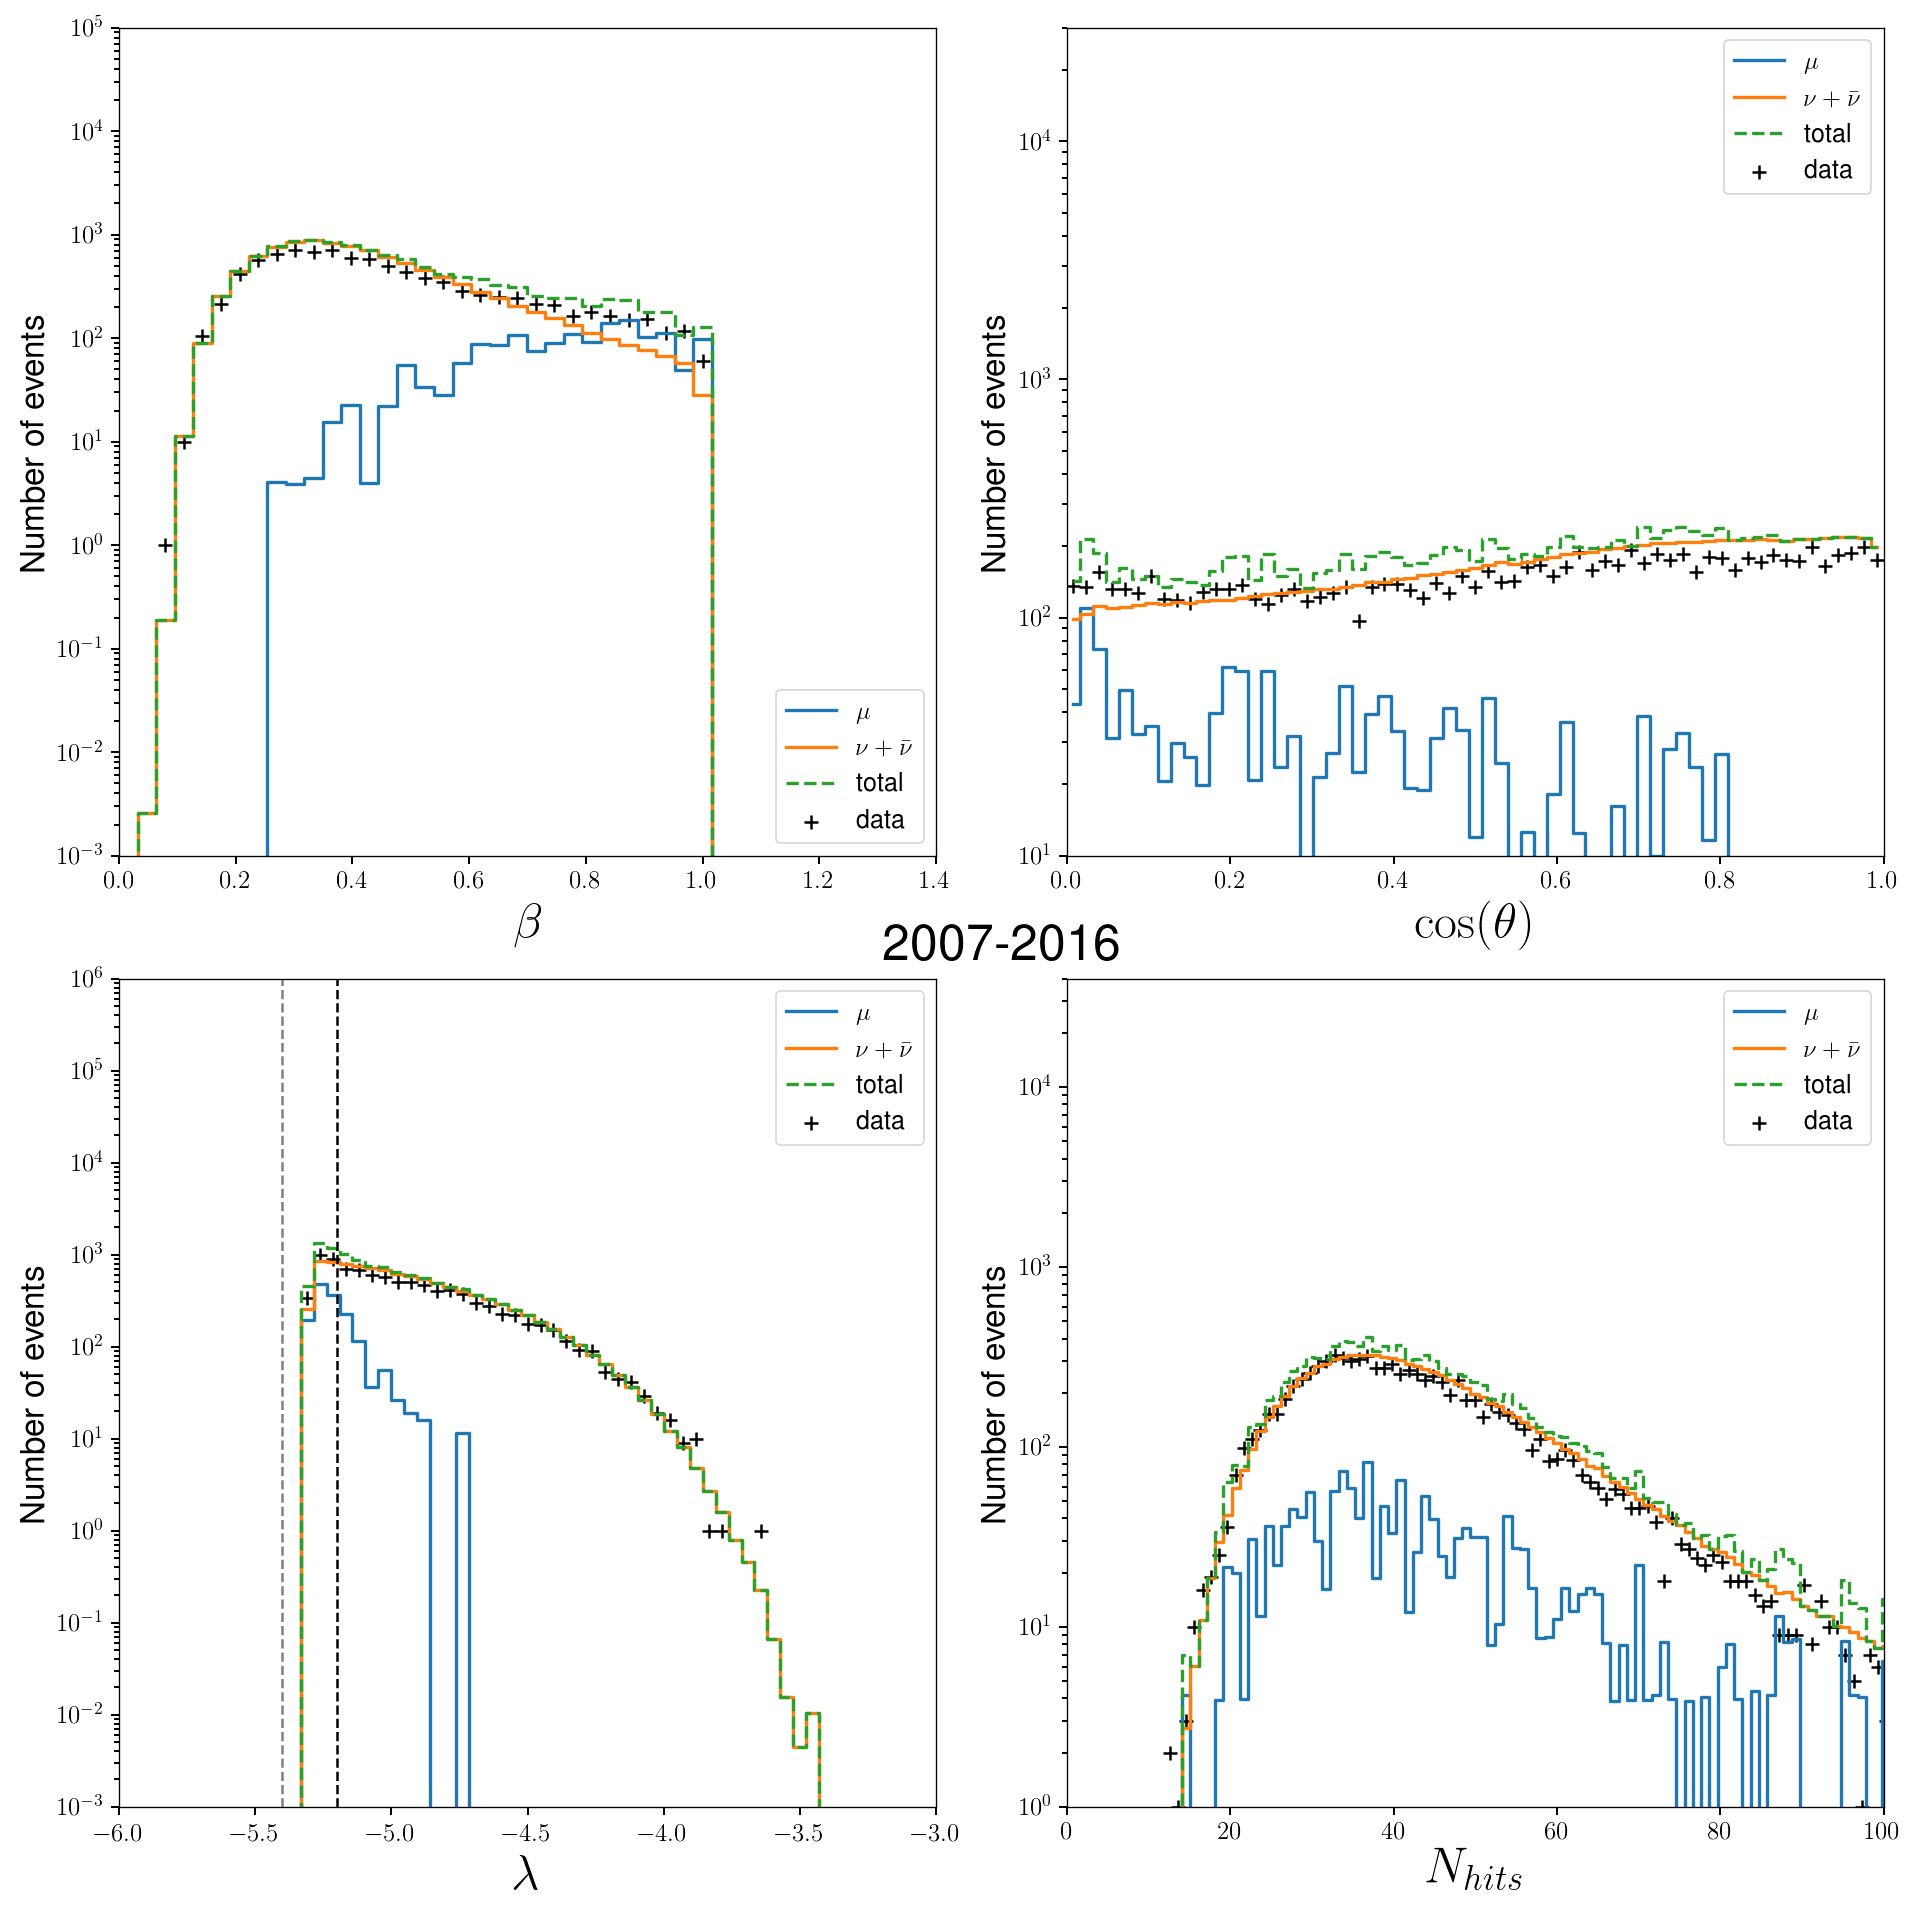

In [16]:
bins = np.linspace(0,2,64)
fonto = 30

bg_mu,x_mu = np.histogram((mu_arr["a_beta"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_beta"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_beta"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_beta"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

fig, ax = plt.subplots(2,2,figsize=[16,16])
fig.text(.46,.5,"2007-2016",fontsize=30)
ax[0,0].set_xlabel(r"$\beta$",fontsize=fonto)
ax[0,0].set_ylabel(r"Number of events",fontsize=20)

ax[0,0].set_yscale("log")
ax[0,0].set_xlim([0,1.4])
ax[0,0].set_ylim([1e-3,1e5])
ax[0,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,0].scatter(xda_c,bg_da,marker="+",color='k',s=70,lw=1.5,label="data")

legend = ax[0,0].legend(loc='lower right', ncol=1, shadow=False, fontsize=15)
ax[0,0].axvline(x=-5.2,linestyle='--',color='k')
ax[0,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()

bins = np.linspace(-6,-3,64)
bg_mu,x_mu = np.histogram((mu_arr["a_lambda"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_lambda"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_lambda"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_lambda"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[12,7])
ax[1,0].set_xlabel(r"$\lambda$",fontsize=fonto)
ax[1,0].set_ylabel(r"Number of events",fontsize=20)

ax[1,0].set_yscale("log")
ax[1,0].set_xlim([-6,-3])
ax[1,0].set_ylim([1e-3,1e6])
ax[1,0].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,0].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,0].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,0].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")

legend = ax[1,0].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,0].axvline(x=-5.2,linestyle='--',color='k')
ax[1,0].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,1,64)

bg_mu,x_mu = np.histogram(np.cos((mu_arr["a_th"])[mu_cuts2016]),bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram(np.cos((nu_arr["a_th"])[nu_cuts2016]),bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((np.cos(anu_arr["a_th"])[anu_cuts2016]),bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((np.cos(da_arr["a_th"])[da_cuts2016]),bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2


#fig, ax1 = plt.subplots(figsize=[7,7])

ax[0,1].set_xlabel(r"$\cos(\theta)$",fontsize=fonto)
ax[0,1].set_ylabel(r"Number of events",fontsize=20)

ax[0,1].set_yscale("log")
ax[0,1].set_xlim([0,1])
ax[0,1].set_ylim([10,30000])

ax[0,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[0,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[0,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[0,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[0,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[0,1].axvline(x=-5.2,linestyle='--',color='k')
ax[0,1].axvline(x=-5.4,linestyle='--',color='gray')

fig.tight_layout()


bins = np.linspace(0,120,120)


bg_mu,x_mu = np.histogram((mu_arr["a_nhits"])[mu_cuts2016],bins=bins,weights=(mu_arr["mc_wc"])[mu_cuts2016])
xmu_c = (x_mu[:-1]+x_mu[1:])/2

bg_nu,x_bg = np.histogram((nu_arr["a_nhits"])[nu_cuts2016],bins=bins,weights=w_bg_nu[nu_cuts2016])
xnu_c = (x_bg[:-1]+x_bg[1:])/2
bg_anu,x_abg = np.histogram((anu_arr["a_nhits"])[anu_cuts2016],bins=bins,weights=w_bg_anu[anu_cuts2016])
xanu_c = (x_bg[:-1]+x_bg[1:])/2

bg_da,x_abg = np.histogram((da_arr["a_nhits"])[da_cuts2016],bins=bins)
xda_c = (x_bg[:-1]+x_bg[1:])/2

#fig, ax = plt.subplots(figsize=[7,7])
ax[1,1].set_xlabel(r"$N_{hits}$",fontsize=fonto)
ax[1,1].set_ylabel(r"Number of events",fontsize=20)

ax[1,1].set_yscale("log")
ax[1,1].set_ylim([1,40000])
ax[1,1].set_xlim([0,100])

ax[1,1].step(xmu_c,bg_mu,where="mid",lw=2,label=r"$\mu$")
ax[1,1].step(xnu_c,bg_nu+bg_anu,where="mid",lw=2,label=r"$\nu + \bar{\nu}$")

ax[1,1].step(xnu_c,bg_nu+bg_anu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
ax[1,1].scatter(xda_c,bg_da,marker="+",color='k',lw=1.5,s=70,label="data")
legend = ax[1,1].legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
ax[1,1].axvline(x=-5.2,linestyle='--',color='k')
ax[1,1].axvline(x=-5.4,linestyle='--',color='gray')
ax[0,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[0,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[0,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,1].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,1].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax[1,0].tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax[1,0].tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


fig.tight_layout()

In [17]:
mpl.__version__

'2.2.3'

In [18]:
def az_ze_sun(file):
    suninMonth = open(file)
    az, ze  = np.array([]),np.array([])
    for ln in suninMonth:
        if ln[0]=='#':
            continue
        row = ln.split(', ')
        az = np.append(az,float(row[0]))
        ze = np.append(ze,float(row[1][:-1]))
    return az, ze
    
az_01,ze_01 = az_ze_sun('Months/enero07.dat')
az_04,ze_04 = az_ze_sun('Months/abril07.dat')
az_07,ze_07 = az_ze_sun('Months/julio07.dat')
az_10,ze_10 = az_ze_sun('Months/noviembre07.dat')

a = az_01[np.argsort(az_01)]-2*(az_01[np.argsort(az_01)]-180)
b = ze_01[np.argsort(az_01)]-2*(ze_01[np.argsort(az_01)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)
ftop = interp1d(x,y)

a = az_07[np.argsort(az_07)]-2*(az_07[np.argsort(az_07)]-180)
b = ze_07[np.argsort(az_07)]-2*(ze_07[np.argsort(az_07)]-90)
x, y = a-360, b
x, y = np.append(x,a), np.append(y,b)
x, y = np.append(x,a+360), np.append(y,b)


fbotom = interp1d(x,y)

In [19]:
xedges = np.linspace(0,360,100)
yedges = np.linspace(0,90,80)
rad2deg= (360./(2.*np.pi))
nu_condition = (nu_cuts2012)&(nu_arr["mc_th"]*rad2deg>ftop(nu_arr["mc_ph"]*rad2deg))&((nu_arr["mc_th"]*rad2deg<fbotom(nu_arr["mc_ph"]*rad2deg)))
H, ph_nu_SunTracking, th_nu_SunTracking = np.histogram2d(rad2deg*(nu_arr["a_ph"])[nu_condition], 
                                   rad2deg*(nu_arr["a_th"])[nu_condition],
                                   bins=(xedges, yedges),
                                   weights=w_sg_nu_tt[nu_condition])
nu_SunT = H.T


anu_condition = (anu_cuts2012)&(anu_arr["mc_th"]*rad2deg>ftop(anu_arr["mc_ph"]*rad2deg))&((anu_arr["mc_th"]*rad2deg<fbotom(anu_arr["mc_ph"]*rad2deg)))
H, ph_anu_SunTracking, th_anu_SunTracking = np.histogram2d(rad2deg*(anu_arr["a_ph"])[anu_condition], 
                                   rad2deg*(anu_arr["a_th"])[anu_condition],
                                   bins=(xedges, yedges),
                                   weights=w_sg_anu_tt[anu_condition])
anu_SunT = H.T

<IPython.core.display.Javascript object>


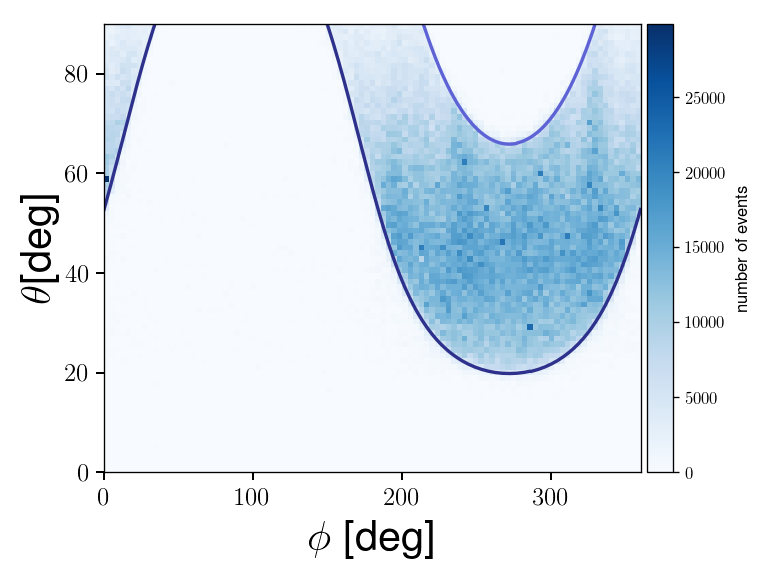

In [20]:
phi_arr = np.linspace(0,360,720)
fig, ax = plt.subplots()
fonto=25
ax.plot(phi_arr, ftop(phi_arr),color="#2d318c",lw=2)
ax.plot(phi_arr, fbotom(phi_arr),color="#5d62d5",lw=2)
ax.set_xlabel(r"$\phi$ [deg]",fontsize=fonto)
ax.set_ylabel(r"$\theta $[deg]",fontsize=fonto)

allofthem = ax.imshow(nu_SunT+anu_SunT,interpolation='nearest', origin='low',cmap="Blues",
                       extent=[ph_anu_SunTracking[0], ph_anu_SunTracking[-1],
                               th_anu_SunTracking[0], th_anu_SunTracking[-1]],
                      aspect='auto')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,)
cbar = plt.colorbar(allofthem,cax=cax,label=r'number of events')
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
fig.tight_layout()

In [115]:
xedges = np.linspace(0,360,90)
yedges = np.linspace(0,90,60)
rad2deg= (360./(2.*np.pi))
nu_condition = (nu_cuts2012)&(nu_arr["mc_th"]*rad2deg>ftop(nu_arr["mc_ph"]*rad2deg))&\
               ((nu_arr["mc_th"]*rad2deg<fbotom(nu_arr["mc_ph"]*rad2deg)))
nu_condition = nu_condition&(nu_arr["mc_sunr2"]<100)
H, ph_nu_SunTracking, th_nu_SunTracking = np.histogram2d(rad2deg*(nu_arr["a_ph"])[nu_condition], 
                                   rad2deg*(nu_arr["a_th"])[nu_condition],
                                   bins=(xedges, yedges),
                                   weights=w_bg_nu[nu_condition])
nu_SunT = H.T


anu_condition = (anu_cuts2012)&(anu_arr["mc_th"]*rad2deg>ftop(anu_arr["mc_ph"]*rad2deg))&\
                ((anu_arr["mc_th"]*rad2deg<fbotom(anu_arr["mc_ph"]*rad2deg)))
anu_condition = anu_condition&(anu_arr["mc_sunr2"]<100)
H, ph_anu_SunTracking, th_anu_SunTracking = np.histogram2d(rad2deg*(anu_arr["a_ph"])[anu_condition], 
                                   rad2deg*(anu_arr["a_th"])[anu_condition],
                                   bins=(xedges, yedges),
                                   weights=w_bg_anu[anu_condition])
anu_SunT = H.T

<IPython.core.display.Javascript object>


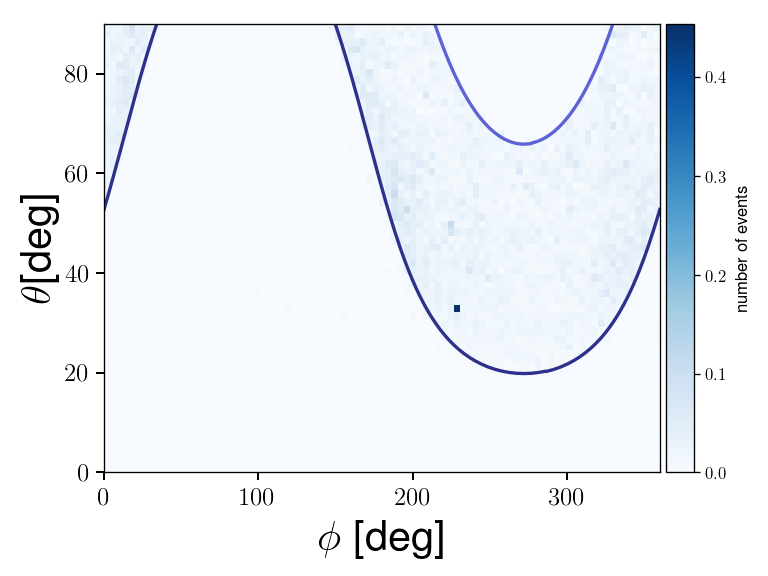

In [116]:
phi_arr = np.linspace(0,360,720)
fig, ax = plt.subplots()
fonto=25
ax.plot(phi_arr, ftop(phi_arr),color="#2d318c",lw=2)
ax.plot(phi_arr, fbotom(phi_arr),color="#5d62d5",lw=2)
ax.set_xlabel(r"$\phi$ [deg]",fontsize=fonto)
ax.set_ylabel(r"$\theta $[deg]",fontsize=fonto)

allofthem = ax.imshow(nu_SunT+anu_SunT,interpolation='nearest', origin='low',cmap="Blues",
                       extent=[ph_anu_SunTracking[0], ph_anu_SunTracking[-1],
                               th_anu_SunTracking[0], th_anu_SunTracking[-1]],
                      aspect='auto')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,)
cbar = plt.colorbar(allofthem,cax=cax,label=r'number of events')
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
fig.tight_layout()

In [23]:
nu_diff_th = (np.degrees(nu_arr["a_th"]-nu_arr["mc_th"]))**2
nu_diff_ph = (np.degrees(nu_arr["a_ph"]-nu_arr["mc_ph"]))**2
anu_diff_th = (np.degrees(anu_arr["a_th"]-anu_arr["mc_th"]))**2
anu_diff_ph = (np.degrees(anu_arr["a_ph"]-anu_arr["mc_ph"]))**2

nu_psi = np.sqrt(nu_diff_ph + nu_diff_th)[nu_condition]
anu_psi = np.sqrt(anu_diff_ph + anu_diff_th)[anu_condition]
bg_nu_psi = np.sqrt(nu_arr['a_sunr2'])[nu_cuts2012]
bg_anu_psi = np.sqrt(anu_arr['a_sunr2'])[anu_cuts2012]


In [24]:
bins = np.linspace(-3.5,2.5,100)
## (anti-)neutrino signal for tau tau
dowenorm=False
sg_nu_tt,xa_sg = np.histogram(np.log10(nu_psi),bins=bins,weights=w_sg_nu_tt[nu_condition],
                              normed=dowenorm)
xanu_c = (xa_sg[:-1]+xa_sg[1:])/2
sg_anu_tt,xa_sg = np.histogram(np.log10(anu_psi),bins=bins,weights=w_sg_anu_tt[anu_condition],
                               normed=dowenorm)
## (anti-)neutrino signal for W+W-
sg_nu_WW,xa_sg = np.histogram(np.log10(nu_psi),bins=bins,weights=w_sg_nu_WW[nu_condition],
                              normed=dowenorm)
xanu_c = (xa_sg[:-1]+xa_sg[1:])/2
sg_anu_WW,xa_sg = np.histogram(np.log10(anu_psi),bins=bins,weights=w_sg_anu_WW[anu_condition],
                               normed=dowenorm)
## (anti-)neutrino signal for b b-bar
sg_nu_bb,xa_sg = np.histogram(np.log10(nu_psi),bins=bins,weights=w_sg_nu_bb[nu_condition],
                              normed=dowenorm)
xanu_c = (xa_sg[:-1]+xa_sg[1:])/2
sg_anu_bb,xa_sg = np.histogram(np.log10(anu_psi),bins=bins,weights=w_sg_anu_bb[anu_condition],
                               normed=dowenorm)
# background
bg_nu,xa_sg = np.histogram(np.log10(bg_nu_psi),bins=bins,weights=w_bg_nu[nu_cuts2012],
                              normed=dowenorm)
xanu_c = (xa_sg[:-1]+xa_sg[1:])/2
bg_anu,xa_sg = np.histogram(np.log10(bg_anu_psi),bins=bins,weights=w_bg_anu[anu_cuts2012],
                               normed=dowenorm)
# cumulative
psf_bb = np.cumsum(((sg_nu_bb+sg_anu_bb)/2./np.pi/np.sin(np.radians(10**xanu_c)))[::-1])[::-1]#np.sum(((sg_nu_bb+sg_anu_bb)*np.sin(np.radians(10**xanu_c))))
psf_WW = np.cumsum(((sg_nu_WW+sg_anu_WW)/2./np.pi/np.sin(np.radians(10**xanu_c)))[::-1])[::-1]#/np.sum(((sg_nu_WW+sg_anu_WW)*np.sin(np.radians(10**xanu_c))))
psf_tt = np.cumsum(((sg_nu_tt+sg_anu_tt)/2./np.pi/np.sin(np.radians(10**xanu_c)))[::-1])[::-1]#/np.sum(((sg_nu_tt+sg_anu_tt)*np.sin(np.radians(10**xanu_c))))
psf_bg = np.cumsum(((bg_nu+bg_anu)/2./np.pi/np.sin(np.radians(10**xanu_c)))[::-1])[::-1]#/np.sum(((sg_nu_tt+sg_anu_tt)*np.sin(np.radians(10**xanu_c))))


phi_rad = np.radians(10**xa_sg)
binsize = (phi_rad[1:]-phi_rad[:-1])
# normalization of dP/d\Omega
norm_bb = np.sum(psf_bb * binsize )
norm_WW = np.sum(psf_WW * binsize)
norm_tt = np.sum(psf_tt * binsize )
norm_bg = np.sum(psf_bg * binsize)

print norm_WW

#normalization of cumulative
norm_bb_lh =  np.sum((np.cumsum(((sg_nu_bb+sg_anu_bb)*2.*np.pi*np.sin(np.radians(10**xanu_c)))[::-1])[::-1])*binsize)
norm_WW_lh =  np.sum((np.cumsum(((sg_nu_WW+sg_anu_WW)*2.*np.pi*np.sin(np.radians(10**xanu_c)))[::-1])[::-1])*binsize)
norm_tt_lh =  np.sum((np.cumsum(((sg_nu_tt+sg_anu_tt)*2.*np.pi*np.sin(np.radians(10**xanu_c)))[::-1])[::-1])*binsize)
norm_bg_lh =  np.sum((np.cumsum(((bg_nu+bg_anu)*2.*np.pi*np.sin(np.radians(10**xanu_c)))[::-1])[::-1])*binsize)

29370046126552.883


<IPython.core.display.Javascript object>


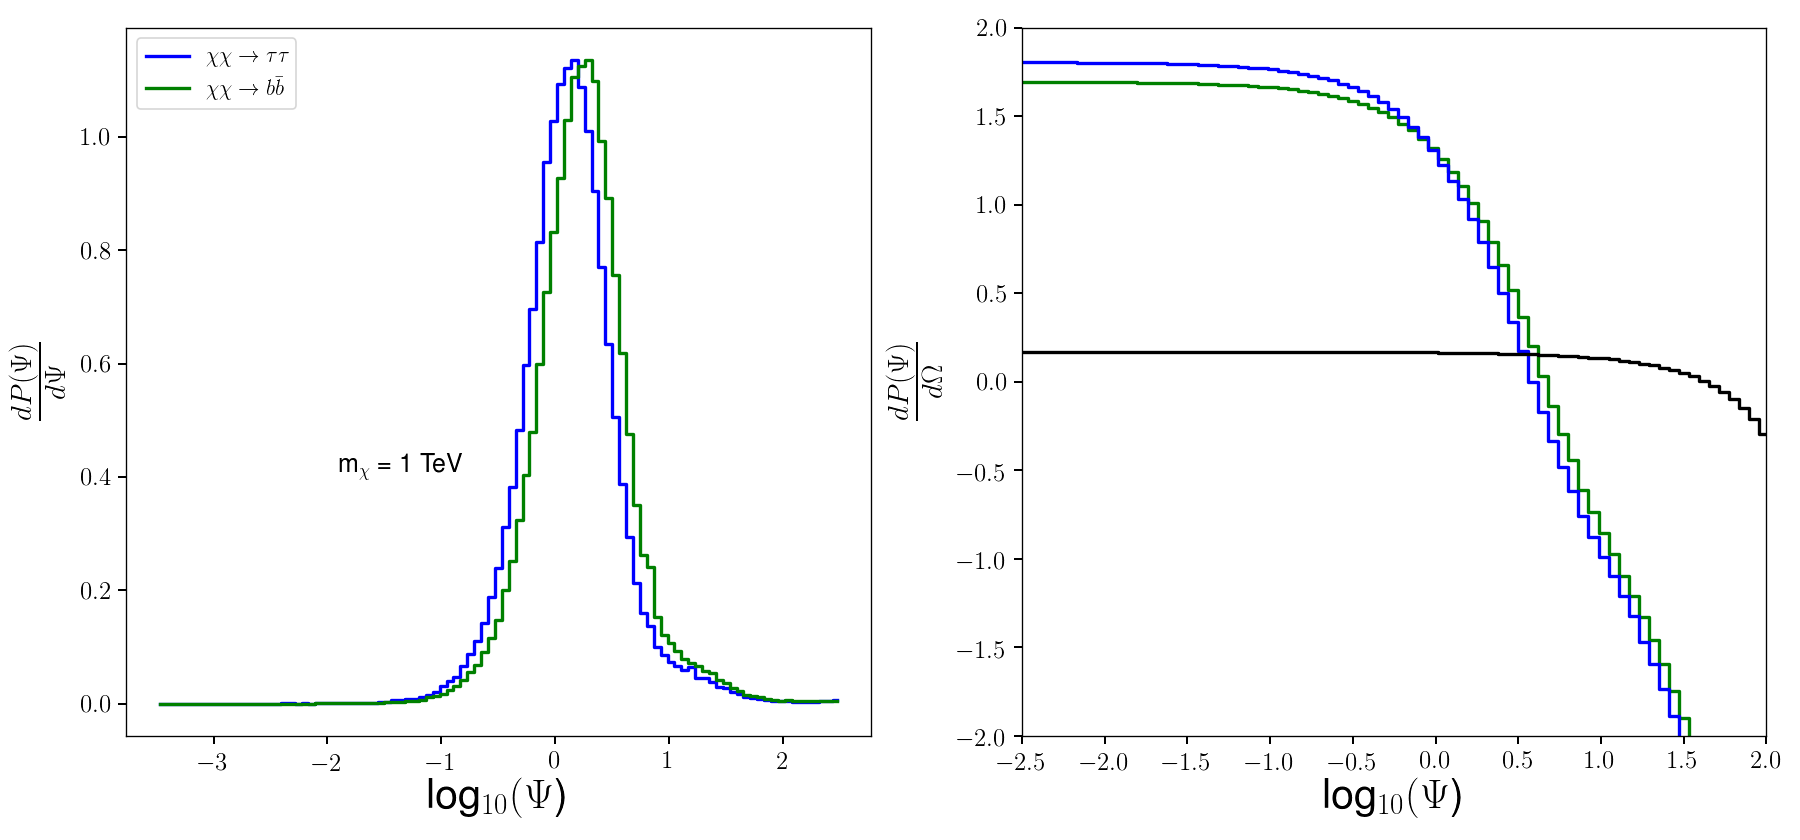

In [25]:

fig, [ax,ax1] = plt.subplots(1,2,figsize=[15,7])
ax.set_xlabel(r"log$_{10}(\Psi$)",fontsize=25)
ax.set_ylabel(r"$\frac{dP(\Psi)}{d\Psi}$",fontsize=25)
n = np.sum((sg_nu_tt+sg_anu_tt)* (xa_sg[1:]-xa_sg[:-1]))
ax.step(xanu_c,(sg_nu_tt+sg_anu_tt)/n,where="mid",lw=2,color='b',label=r"$\chi\chi\to \tau \tau$")
n = np.sum((sg_nu_bb+sg_anu_bb)* (xa_sg[1:]-xa_sg[:-1]))
ax.step(xanu_c,(sg_nu_bb+sg_anu_bb)/n,where="mid",lw=2,color='g',label=r"$\chi\chi\to b \bar{b}$")
n = np.sum((sg_nu_WW+sg_anu_WW)* (xa_sg[1:]-xa_sg[:-1]))
#ax.step(xanu_c,(sg_nu_WW+sg_anu_WW)/n,where="mid",lw=2,color='r',label=r"$\chi\chi\to W^+ W^-$")
ax.text(-1.9,0.4,r"m$_{\chi}$ = 1 TeV",fontsize=15)

#ax.step(xanu_c,(sg_nu_bg+sg_anu_bg),where="mid",lw=2,color='k',label=r"bg")


#ax.step(xnu_c,bg_nu+bg_mu,where="mid",linestyle="--",lw=2,label="total")
legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=13)
#ax.set_ylim([1e-1,1e4])
#ax.set_yscale("log")



ax1.set_xlabel(r"log$_{10}(\Psi$)",fontsize=25)
ax1.set_ylabel(r"$\frac{dP(\Psi)}{d\Omega}$",fontsize=25)
#ax1.set_yscale('log')
#ax1.step(xanu_c,1./np.sin(np.radians(10**xanu_c)),color='g',where="mid",lw=2)
ax1.step(xanu_c,np.log10(psf_bb / norm_bb) ,color='g',where="mid",lw=2,
        label=r"$\chi\chi\to \tau \tau$ size = 10 deg")

ax1.step(xanu_c,np.log10(psf_tt / norm_tt),color='b',where="mid",lw=2,
        label=r"$\chi\chi\to \tau \tau$ size = 10 deg")

#ax1.step(xanu_c,psf_WW / norm_WW,color='r' ,where="mid",lw=2,
#        label=r"$\chi\chi\to \tau \tau$ size = 10 deg")

ax1.step(xanu_c,np.log10(psf_bg / norm_bg),color='k' ,where="mid",lw=2,
        label=r"bg")
#ax1.step(10**xanu_c,psf_bg / norm_bg,color='k' ,where="mid",lw=2,
#        label=r"bg")

ax1.set_xlim([-2.5,2])   
ax1.set_ylim([-2,2])    

legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=13)


fig.tight_layout()
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax1.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax1.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
fig.tight_layout()

<IPython.core.display.Javascript object>


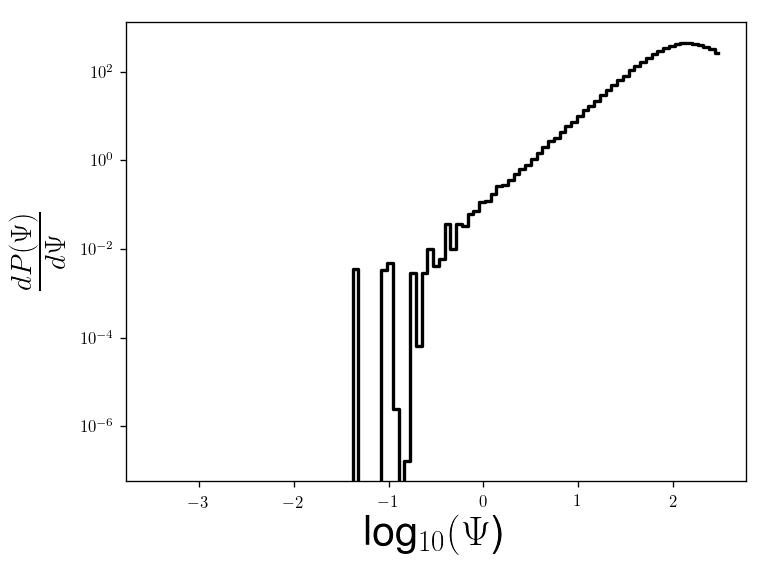

In [26]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xlabel(r"log$_{10}(\Psi$)",fontsize=25)
ax.set_ylabel(r"$\frac{dP(\Psi)}{d\Psi}$",fontsize=25)
#ax.step(xanu_c,sg_nu_tt,where="mid",lw=2,color='b',label=r"$\chi\chi\to \tau \tau$")
#ax.step(xanu_c,sg_nu_bb,where="mid",lw=2,color='g',label=r"$\chi\chi\to b \bar{b}$")
#ax.step(xanu_c,sg_nu_WW,where="mid",lw=2,color='r',label=r"$\chi\chi\to W^+ W^-$")
ax.step(xanu_c,bg_nu,where="mid",lw=2,color='k')
fig.tight_layout()

In [27]:
ctmingen, ctmaxgen = -1, 1

Itheta = 4 * np.pi * np.abs(ctmingen - ctmaxgen)

sy = 31557600 # seconds in year
# Low Energys
spectrumindex = 1.7
# energy limits in GeV
emingen, emaxgen = 5, 2e4
Ienergylow = ((emaxgen**(1 - spectrumindex )) - (emingen**(1 - spectrumindex )))/(1-spectrumindex)

# Hight Energys
spectrumindex = 1.2
# energy limits in GeV
emingen, emaxgen = 2e4, 1e5
Ienergyhigh = ((emaxgen**(1 - spectrumindex )) - (emingen**(1 - spectrumindex )))/(1-spectrumindex)

factorlow = Itheta * Ienergylow * sy
factorhigh = Itheta * Ienergyhigh * sy

In [28]:
def sun_traking_correction_nu(ph,th):
    ph_index = np.where(np.abs(rad2deg*ph-ph_nu_SunTracking[:-1])==np.abs(rad2deg*ph-ph_nu_SunTracking[:-1]).min())[0]
    th_index = np.where(np.abs(rad2deg*th-th_nu_SunTracking[:-1])==np.abs(rad2deg*th-th_nu_SunTracking[:-1]).min())[0]
    
    P=nu_SunT[th_index,ph_index]
    
    delta_costh = np.cos(ph_nu_SunTracking[ph_index])-np.cos(ph_nu_SunTracking[ph_index+1])
    delta_ph = th_nu_SunTracking[th_index]-th_nu_SunTracking[th_index+1]
    return 4.*np.pi/P/delta_costh/delta_ph

sun_exposure_nu = np.vectorize(sun_traking_correction_nu)

def sun_traking_correction_anu(ph,th):
    ph_index = np.where(np.abs(ph-ph_anu_SunTracking)==np.abs(ph-ph_anu_SunTracking).min())[0]
    th_index = np.where(np.abs(th-th_anu_SunTracking)==np.abs(th-th_anu_SunTracking).min())[0]
    P=anu_SunT[ph_index,th_index]
    delta_costh = np.cos(ph_anu_SunTracking[ph_index])-np.cos(ph_anu_SunTracking[ph_index+1])
    delta_ph = th_anu_SunTracking[th_index]-th_anu_SunTracking[th_index+1]
    return 4.*np.pi/P/delta_costh/delta_ph

sun_exposure_anu = np.vectorize(sun_traking_correction_anu)
    
    

# Effective Area


In [117]:
%%latex
\begin{equation}
A_{eff}^{\nu} = \frac{w2\; N_{bin} \;(1-\Gamma)}{(E_M^{1-\Gamma}-E_m^{1-\Gamma})E^{\Gamma} \; I_{\theta}\; F\; (k E^{\Gamma})}

\end{equation}

here the quantities $(k E^{\Gamma})$ are in the internal note but not in CT code. 

<IPython.core.display.Latex object>

In [118]:
np.cos(np.pi)

-1.0

In [131]:
th, ph = np.radians(91),np.radians(308)

def N_bin_nu(th,ph):
    if th>90 or th <=0:
        return -1e6,-1e6,0
    if ph>360 or ph <= 0:
        return -1e6,-1e6,0
    ph_i = np.where(ph_nu_SunTracking[:-1] < np.degrees(ph))[-1][-1]
    th_i = np.where(th_nu_SunTracking[:-1] < np.degrees(th))[-1][-1]
    p1,p2 = ph_nu_SunTracking[ph_i], ph_nu_SunTracking[ph_i+1]
    t1,t2 = th_nu_SunTracking[th_i], th_nu_SunTracking[th_i+1]        
    N = nu_SunT[th_i][ph_i]
    
    return np.radians(p2-p1), np.cos(np.radians(t1))-np.cos(np.radians(t2)), N
fromsunTrackinHist_nu =  np.vectorize(N_bin_nu)

def N_bin_anu(th,ph):
    if th>90 or th <=0:
        return -1e6,-1e6,0
    if ph>360 or ph <= 0:
        return -1e6,-1e6,0
    ph_i = np.where(ph_anu_SunTracking[:-1] < np.degrees(ph))[-1][-1]
    th_i = np.where(th_anu_SunTracking[:-1] < np.degrees(th))[-1][-1]
    p1,p2 = ph_anu_SunTracking[ph_i], ph_anu_SunTracking[ph_i+1]
    t1,t2 = th_anu_SunTracking[th_i], th_anu_SunTracking[th_i+1]        
    N = anu_SunT[th_i][ph_i]
    
    return np.radians(p2-p1), np.cos(np.radians(t1))-np.cos(np.radians(t2)), N
fromsunTrackinHist_anu =  np.vectorize(N_bin_anu)


In [132]:
nu_cuts2012   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2012)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)&\
               (nu_arr["a_beta"]<beta_max)&(nu_arr["a_lambda"]>lam_min)
    
nu_cuts2016   = (nu_arr["ymd"]>ymd_min)&(nu_arr["ymd"]<ymd_max2016)&\
             (np.cos(nu_arr["a_th"])>cos_min)&(np.cos(nu_arr["a_th"])<cos_max)&(nu_arr["a_beta"]<beta_max)&(nu_arr["a_lambda"]>lam_min)
 

In [133]:
%%latex
\begin{equation}
I_E = \frac{E_M^{1-\Gamma} - E_m^{1-\Gamma}}{1-\Gamma}
\end{equation}

<IPython.core.display.Latex object>

In [134]:
def Effective_A(kind,cuts):
    
    if kind=='nu':
        datasetum = nu_arr
        k=np.sum(w_bg_nu[cuts])
        Iphi, Itheta, N = fromsunTrackinHist_nu(datasetum["mc_th"][cuts],datasetum["mc_ph"][cuts])
    elif kind=='anu':
        datasetum = anu_arr
        k=np.sum(w_bg_anu[cuts])
        Iphi, Itheta, N = fromsunTrackinHist_anu(datasetum["mc_th"][cuts],datasetum["mc_ph"][cuts])
    else:
        sys.exit("wrong kind")
    
    I_E  =   np.zeros(datasetum["mc_th"][cuts].shape)
    E2Gamma  =   np.zeros(datasetum["mc_th"][cuts].shape)

    F = 31557600. #seconds in a year
    hi_energy = np.where(datasetum["mc_ene"][cuts]>=2e4)
    lo_energy = np.where(datasetum["mc_ene"][cuts]<2e4)
    #high energies
    E_m, E_M, spectindx =2e4, 1e5,1.-1.2
    I_E[hi_energy] = ((E_M**spectindx)-(E_m**spectindx))/(spectindx)
    E2Gamma[hi_energy]= (datasetum["mc_ene"][cuts])[hi_energy]**(-spectindx+1)
    print E_m, E_M, spectindx 
    #low energies
    E_m, E_M, spectindx =5, 2e4,1.-1.55
    I_E[lo_energy] = ((E_M**spectindx)-(E_m**spectindx))/(spectindx)
    E2Gamma[lo_energy]= (datasetum["mc_ene"][cuts])[lo_energy]**(-spectindx+1)
    print E_m, E_M, spectindx 

    
    Aeff=(N/ Itheta/Iphi) * ((datasetum["mc_w2"][cuts])/ I_E/ F/ E2Gamma)
    bins = np.logspace(1, 8, 80)
    num,bins= np.histogram(datasetum["mc_ene"][cuts], bins=bins)#,weights=w_bg_nu[cuts])
    hist,bins= np.histogram(datasetum["mc_ene"][cuts], bins=bins,weights=Aeff)
    center = (bins[1:]+bins[:-1])/2
    return center, hist/num/k

In [135]:
%%latex
\begin{equation}
A_{eff} = \frac{N_{bin}^{\odot}}{I_{theta} \Delta{\Phi}}\frac{w2}{I_E F E^{\Gamma} k}
\end{equation}

<IPython.core.display.Latex object>

In [136]:
Aeff_nu2012 = Effective_A('nu',nu_cuts2012 )

20000.0 100000.0 -0.2
5 20000.0 -0.55


In [137]:
Aeff_nu2016 = Effective_A('nu',nu_cuts2016 )

20000.0 100000.0 -0.2
5 20000.0 -0.55


In [138]:
Aeff_anu2016 = Effective_A('anu',anu_cuts2016 )

20000.0 100000.0 -0.2
5 20000.0 -0.55


In [139]:
Aeff_anu2012 = Effective_A('anu',anu_cuts2012 )

20000.0 100000.0 -0.2
5 20000.0 -0.55


<IPython.core.display.Javascript object>


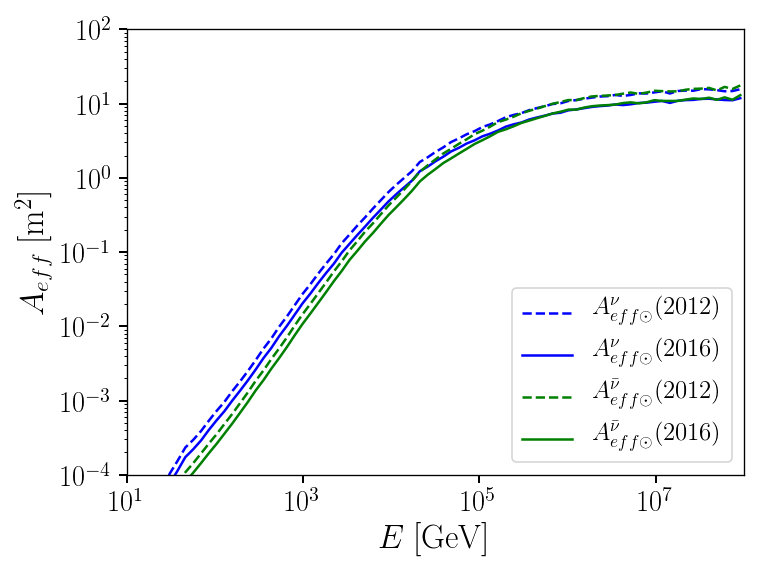

In [140]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([10,1e8])
ax.set_ylim([1e-4,1e2])
ax.set_xlabel(r"$E \rm \;[GeV]$",fontsize=20)
ax.set_ylabel(r"$A_{eff} \rm \;[m^2]$",fontsize=20)

ax.plot(Aeff_nu2012[0],Aeff_nu2012[1],ls='--',c='b' ,label=r"$A_{eff\odot}^{\nu}(2012)$")
ax.plot(Aeff_nu2016[0],Aeff_nu2016[1],c='b',label=r"$A_{eff\odot}^{\nu}(2016)$")
ax.plot(Aeff_nu2012[0],Aeff_anu2012[1],c='g',ls='--',label=r"$A_{eff\odot}^{\bar{\nu}}(2012)$")
ax.plot(Aeff_nu2016[0],Aeff_anu2016[1],c='g',label=r"$A_{eff\odot}^{\bar{\nu}}(2016)$")
legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)
plt.tight_layout()

In [142]:
def Effective_A_1TeV(kind,cuts):
    
    if kind=='nu':
        datasetum = nu_arr
        k=np.sum(w_bg_nu[cuts])
        Iphi, Itheta, N = fromsunTrackinHist_nu(datasetum["mc_th"][cuts],datasetum["mc_ph"][cuts])
    elif kind=='anu':
        datasetum = anu_arr
        k=np.sum(w_bg_anu[cuts])
        Iphi, Itheta, N = fromsunTrackinHist_anu(datasetum["mc_th"][cuts],datasetum["mc_ph"][cuts])
    else:
        sys.exit("wrong kind")
    
    I_E  =   np.zeros(datasetum["mc_th"][cuts].shape)
    E2Gamma  =   np.zeros(datasetum["mc_th"][cuts].shape)

    F = 31557600. #seconds in a year
    hi_energy = np.where(datasetum["mc_ene"][cuts]>=2e4)
    lo_energy = np.where(datasetum["mc_ene"][cuts]<2e4)
    #high energies
    E_m, E_M, spectindx =2e4, 1e5,1.-1.2
    I_E[hi_energy] = ((E_M**spectindx)-(E_m**spectindx))/(spectindx)
    E2Gamma[hi_energy]= (datasetum["mc_ene"][cuts])[hi_energy]**(-spectindx+1)
    print E_m, E_M, spectindx 
    #low energies
    E_m, E_M, spectindx =5, 2e4,1.-1.55
    I_E[lo_energy] = ((E_M**spectindx)-(E_m**spectindx))/(spectindx)
    E2Gamma[lo_energy]= (datasetum["mc_ene"][cuts])[lo_energy]**(-spectindx+1)
    print E_m, E_M, spectindx 

    
    Aeff=(N/ Itheta/Iphi) * ((datasetum["mc_w2"][cuts])/ I_E/ F/ E2Gamma)
    bins = np.linspace(1, 8e3, 750)
    num,bins= np.histogram(datasetum["mc_ene"][cuts], bins=bins)#,weights=w_bg_nu[cuts])
    hist,bins= np.histogram(datasetum["mc_ene"][cuts], bins=bins,weights=Aeff)
    center = (bins[1:]+bins[:-1])/2
    return center, hist/num/k

In [143]:
Aeff_nu2012 = Effective_A_1TeV('nu',nu_cuts2012 )
Aeff_nu2016 = Effective_A_1TeV('nu',nu_cuts2016 )
Aeff_anu2012 = Effective_A_1TeV('anu',anu_cuts2012 )
Aeff_anu2016 = Effective_A_1TeV('anu',anu_cuts2016 )

20000.0 100000.0 -0.2
5 20000.0 -0.55
20000.0 100000.0 -0.2
5 20000.0 -0.55
20000.0 100000.0 -0.2
5 20000.0 -0.55
20000.0 100000.0 -0.2
5 20000.0 -0.55


<IPython.core.display.Javascript object>


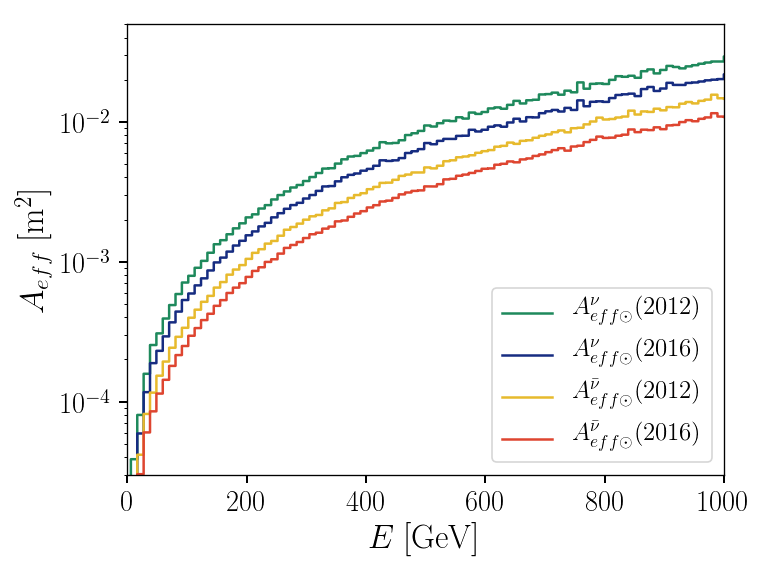

In [360]:
fig, ax = plt.subplots()

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([-1,1e3])
ax.set_ylim([3e-5,5e-2])
ax.set_xlabel(r"$E \rm \;[GeV]$",fontsize=20)
ax.set_ylabel(r"$A_{eff} \rm \;[m^2]$",fontsize=20)

ax.step(Aeff_nu2012[0],Aeff_nu2012[1],ls='--',c='#1e895c' ,label=r"$A_{eff\odot}^{\nu}(2012)$")
ax.step(Aeff_nu2016[0],Aeff_nu2016[1],c='#162c81',label=r"$A_{eff\odot}^{\nu}(2016)$")
ax.step(Aeff_nu2012[0],Aeff_anu2012[1],c='#e7ba2d',ls='--',label=r"$A_{eff\odot}^{\bar{\nu}}(2012)$")
ax.step(Aeff_nu2016[0],Aeff_anu2016[1],c='#de4530',label=r"$A_{eff\odot}^{\bar{\nu}}(2016)$")
legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)
plt.tight_layout()

In [345]:
f_Aeff_nu2012 = interp1d(Aeff_nu2012[0],Aeff_nu2012[1])
f_Aeff_anu2012 = interp1d(Aeff_anu2012[0],Aeff_anu2012[1])
f_Aeff_nu2016 = interp1d(Aeff_nu2016[0],Aeff_nu2016[1])
f_Aeff_anu2016 = interp1d(Aeff_anu2016[0],Aeff_anu2016[1])

In [346]:

def get_diff(mass,channel,nu):
    if channel=='tautau':
        ch = 11
    elif channel=='WW':
        ch = 8 
    elif channel=='bb':
        ch =5
    else:
        sys.exit("Nope, not a valid channel use eithe tautau, WW or bb")
    if nu=='nue':
        mynu=12
    elif nu=='anue':
        mynu=13
    elif nu=='numu':
        mynu=14
    elif nu=='anumu':
        mynu=15
    elif nu=='nutau':
        mynu=16
    elif nu=='anutau':
        mynu=17
    else:
        sys.exit("wrong nu flav, use: nue, anue, numu, anumu, nutau, anutau")
    datafile = open('../../dat-wa/wa-m'+str(mass)+'-ch'+str(ch)+'-sun-sum.dat')
    num = -1
    diff = np.array([])
    for l in datafile:
        if l[0]=='#':
            continue
        num += 1
        if num!=mynu:# or num>17:
            continue   
        row = l.split(' ')
        diff = np.append(diff,np.array(row[1:],dtype=float))
    return diff

In [347]:
threshold = 70. #GeV

In [348]:
m250tau = get_diff(250,'tautau','numu')
m10000tau = get_diff(10000,'tautau','numu')
m10tau = get_diff(10,'tautau','numu')



x = np.linspace(0.0025,1.,200)
f_Aeff_nu2012((x*250)[x>threshold])

array([], dtype=float64)

In [349]:
mass_array = np.array([50,100,150,176,200,250,350,500,750,1000,1500,2000,3000,5000])
tau_spectrum_per_mass_nu = np.zeros([len(mass_array), 200])
tau_spectrum_per_mass_anu = np.zeros([len(mass_array), 200])
bb_spectrum_per_mass_nu = np.zeros([len(mass_array), 200])
bb_spectrum_per_mass_anu = np.zeros([len(mass_array), 200])
WW_spectrum_per_mass_nu = np.zeros([len(mass_array), 200])
WW_spectrum_per_mass_anu = np.zeros([len(mass_array), 200])
for i in range(1,len(mass_array)):
    tau_spectrum_per_mass_nu[i]=get_diff(mass_array[i], 'tautau','numu')
    tau_spectrum_per_mass_anu[i]=get_diff(mass_array[i], 'tautau','anumu')
    bb_spectrum_per_mass_nu[i]=get_diff(mass_array[i], 'bb','numu')
    bb_spectrum_per_mass_anu[i]=get_diff(mass_array[i], 'bb','anumu')
    WW_spectrum_per_mass_nu[i]=get_diff(mass_array[i], 'WW','numu')
    WW_spectrum_per_mass_anu[i]=get_diff(mass_array[i], 'WW','anumu')





<IPython.core.display.Javascript object>


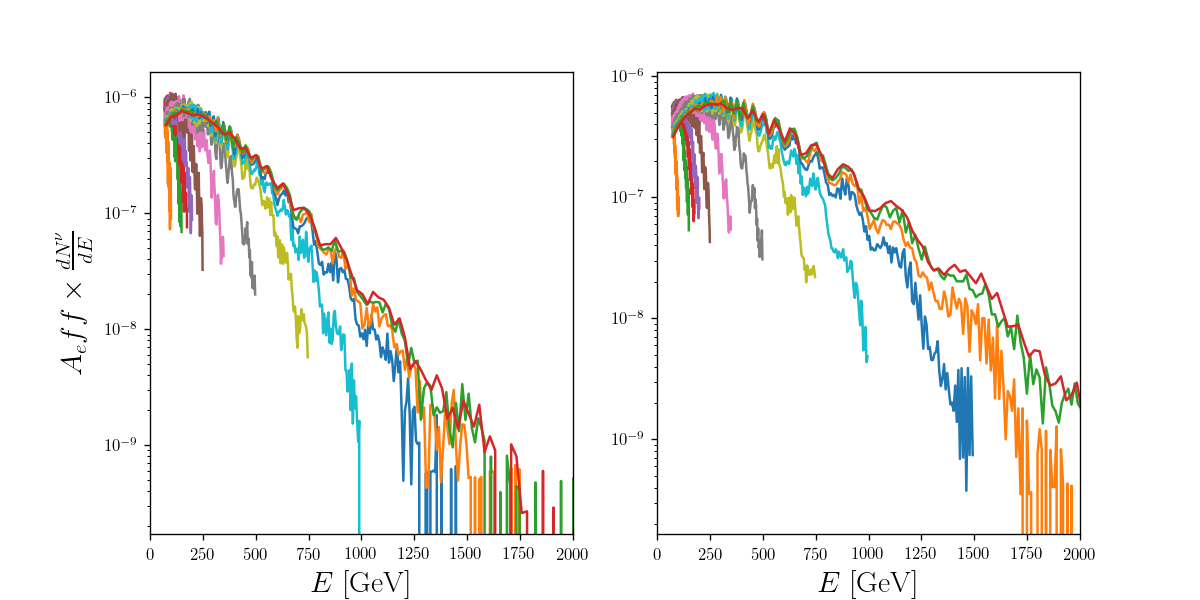

In [350]:
fig, ax = plt.subplots(1,2,figsize=[10,5])
ax[0].set_xlim([0,2000])
ax[1].set_xlim([0,2000])
#ax[0].set_ylim([1e-5,1e-2])
#ax[1].set_ylim([1e-5,1e-2])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xlabel(r"$E\rm\; [GeV]$",fontsize=18)
ax[1].set_xlabel(r"$E\rm\; [GeV]$",fontsize=18)
ax[0].set_ylabel(r"$A_eff\times\frac{dN^{\nu}}{dE}$",fontsize=18)

for i in range(len(mass_array)):
    mass = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*mass
    ran = (e_array>threshold)&(e_array<mass)
    ax[0].plot(e_array[ran],tau_spectrum_per_mass_nu[i][ran]*f_Aeff_nu2012(e_array[ran])/mass)
    ax[1].plot(e_array[ran],tau_spectrum_per_mass_anu[i][ran]*f_Aeff_anu2012(e_array[ran])/mass)





In [352]:
Acc_bb2016 = np.array([])
threshold=60
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*bb_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2016(e_array[int_range])#  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*bb_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2016(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_bb2016 = np.append(Acc_bb2016, nu_part + anu_part)# Teff * Acc_{\tau \tau}
    
print threshold

50 0.0
100 1.2474623053942623e-08
150 3.5996572511063565e-07
176 7.513952109446928e-07
200 1.1800527915884227e-06
250 2.2153851229269793e-06
350 4.341658154573503e-06
500 7.54379599683057e-06
750 1.1619059204081326e-05
1000 1.4537701468128765e-05
1500 1.8408083201449962e-05
2000 2.0805227984827097e-05
3000 2.3262688547167347e-05
5000 2.273952634874884e-05
60


In [353]:
Acc_bb = np.array([])
threshold=60
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*bb_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2012(e_array[int_range])#  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*bb_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2012(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_bb = np.append(Acc_bb, nu_part + anu_part)# Teff * Acc_{\tau \tau}
    
print threshold

50 0.0
100 1.6708808794015573e-08
150 4.824320962581254e-07
176 1.0069090123862158e-06
200 1.5813750004532829e-06
250 2.9689619229124023e-06
350 5.819566398777528e-06
500 1.0112217358306246e-05
750 1.5578006267407673e-05
1000 1.949455423229847e-05
1500 2.468971816187548e-05
2000 2.791166724070151e-05
3000 3.12129320275721e-05
5000 3.052899705769074e-05
60


In [354]:
threshold = 65
Acc_WW2016 = np.array([])
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*WW_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2016(e_array[int_range]) #  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*WW_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2016(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_WW2016 = np.append(Acc_WW2016, nu_part + anu_part)# Teff * Acc_{\tau \tau}
print threshold

50 0.0
100 8.087767766774211e-06
150 2.9081153784272316e-05
176 3.7507971231650516e-05
200 4.4691044697240195e-05
250 5.769569752324397e-05
350 7.888728437537663e-05
500 9.975584061743342e-05
750 0.00011598050517213203
1000 0.00012331731158772476
1500 0.00012533293748404707
2000 0.00012419599504907993
3000 0.00012047898547880534
5000 0.00011606101747275421
65


In [355]:
threshold = 65
Acc_WW = np.array([])
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*WW_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2012(e_array[int_range]) #  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*WW_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2012(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_WW = np.append(Acc_WW, nu_part + anu_part)# Teff * Acc_{\tau \tau}
print threshold

50 0.0
100 1.0848387598167483e-05
150 3.8988147776178006e-05
176 5.031589887925226e-05
200 5.99150388753441e-05
250 7.735671728500268e-05
350 0.00010584792398149034
500 0.00013400069085319654
750 0.0001558594582940004
1000 0.00016575373490290961
1500 0.00016848229672214354
2000 0.00016696262894426894
3000 0.00016197355062284212
5000 0.0001559996157005194
65


In [356]:
threshold = 85
Acc_tautau2016 = np.array([])
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*tau_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2016(e_array[int_range]) #  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*tau_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2016(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_tautau2016 = np.append(Acc_tautau2016, nu_part + anu_part)# Teff * Acc_{\tau \tau}
print threshold

50 0.0
100 3.5895879150995067e-06
150 3.8867599150246526e-05
176 5.960561869925321e-05
200 7.977850207002181e-05
250 0.00011881415236421553
350 0.00018731818462381196
500 0.0002691505202412424
750 0.0003571664810982161
1000 0.0004115227485844782
1500 0.00045763751575446105
2000 0.00047970519476072846
3000 0.0004914034274122167
5000 0.0004808272077223329
85


In [357]:

threshold = 85
Acc_tautau = np.array([])
for i in range(len(mass_array)):
    m_chi = mass_array[i]
    e_array = np.linspace(0.0,1.,200)*m_chi # cirelli's x_array times m_chi
    int_range = (e_array>threshold)&(e_array<=m_chi)
    x = e_array[int_range]
    y  = (1./m_chi)*tau_spectrum_per_mass_nu[i][int_range] # dN/dE for \nu and m_{\chi} 
    y *= f_Aeff_nu2012(e_array[int_range]) #  times Aeff for  \nu in 2012 data                
    nu_part = np.trapz(y,x) # Integrating 
    # we keep the same x because we have the same energy range
    y = (1./m_chi)*tau_spectrum_per_mass_anu[i][int_range]# dN/dE for \bar{\nu} and m_{\chi}
    y *= f_Aeff_anu2012(e_array[int_range])#   times Aeff for  \bar{\nu} in 2012 data                 
    anu_part = np.trapz(y,x)  
    print m_chi, nu_part + anu_part
    Acc_tautau = np.append(Acc_tautau, nu_part + anu_part)# Teff * Acc_{\tau \tau}
print threshold

50 0.0
100 4.8115751600076075e-06
150 5.2116456052534475e-05
176 7.994650267260719e-05
200 0.00010700135911928424
250 0.00015932747195419763
350 0.00025128304517023196
500 0.0003613717990613343
750 0.0004799053553194589
1000 0.0005530956282844382
1500 0.0006152231258115734
2000 0.0006449799653275768
3000 0.0006607147377241107
5000 0.0006463969629090204
85


<IPython.core.display.Javascript object>


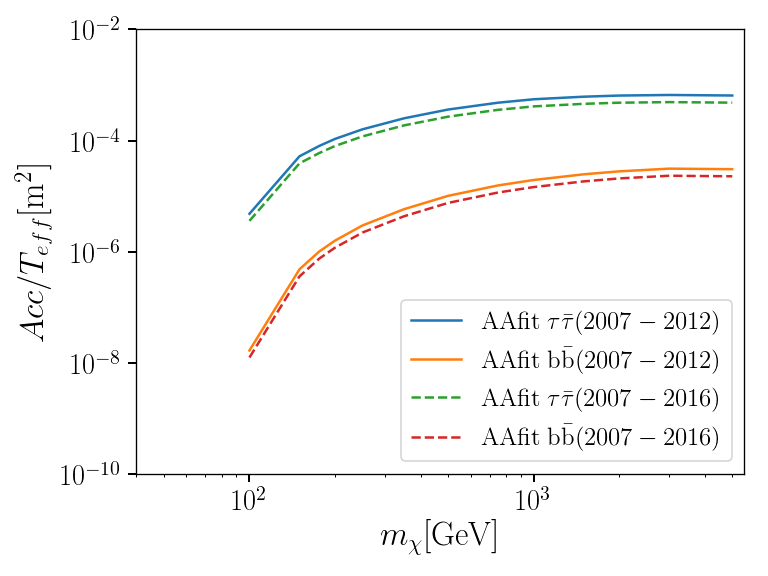

In [359]:
fig, ax = plt.subplots()
ax.set_ylabel(r"$Acc/T_{eff} \rm [m^2]$",fontsize=20)
ax.set_xlabel(r"$m_{\chi} \rm [GeV]$",fontsize=20)


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-10,1e-2])
ax.set_xlim([40,5500])
ax.plot(mass_array[1:], (Acc_tautau[1:]),label=r"$\rm AAfit\; \tau \bar{\tau}(2007-2012)$")
ax.plot(mass_array[1:], (Acc_bb[1:]),label=r"$\rm AAfit\; b \bar{b}(2007-2012)$")
ax.plot(mass_array[1:], (Acc_tautau2016[1:]),'--',label=r"$\rm AAfit\; \tau \bar{\tau}(2007-2016)$")
ax.plot(mass_array[1:], (Acc_bb2016[1:]),'--',label=r"$\rm AAfit\; b \bar{b}(2007-2016)$")

legend = ax.legend(loc='lower right', ncol=1, shadow=False, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=17, size=5,width=1.2)

#ax.plot(mass_array, 1e6*2.3/(Acc_tautau))
#ax.plot(mass_array, 1e6*2.3/(Acc_bb))

plt.tight_layout()

<IPython.core.display.Javascript object>


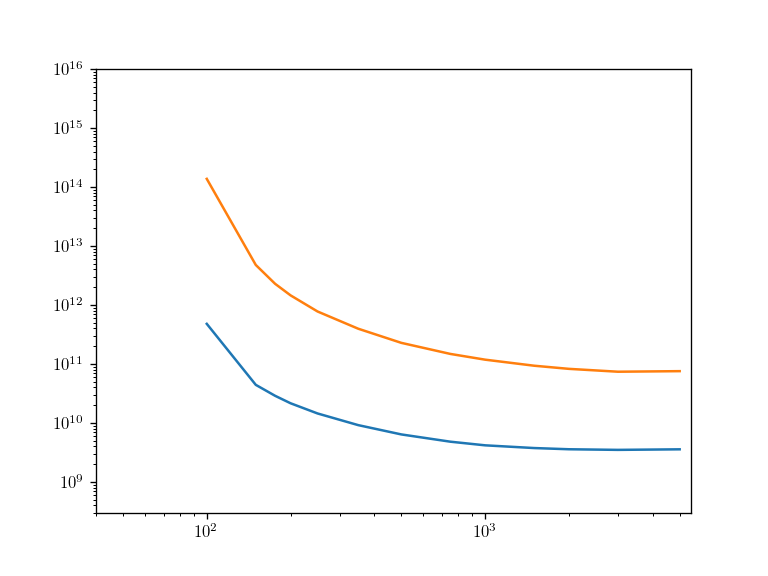

In [318]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([3e8,1e16])
ax.set_xlim([40,5500])
ax.plot(mass_array[1:], 1e6*2.3/(Acc_tautau[1:]))
ax.plot(mass_array[1:], 1e6*2.3/(Acc_bb[1:]))

In [314]:

1e6*2.3/(Acc_tautau[13])/2

1779092517.4285839

In [226]:
Acc_tautau[13]

0.000702768588762878